In [1]:
import argparse
import torch

import matplotlib.pyplot as plt
import torch.multiprocessing as mp

from ga_t3.ga_model_runner import GAModelRunner
from ga_t3.base_model_runner import GpuRunnner


argv = [
]

parser = argparse.ArgumentParser(description="Language transfer")

# main parameters
parser.add_argument("--number_of_gpus", type=int, default=1)
parser.add_argument("--models_per_gpu", type=int, default=1)
parser.add_argument("--number_of_iterations", type=int, default=200)
parser.add_argument("--log_ga_into_file", type=bool, default=True)
parser.add_argument("--verbose", type=bool, default=True)
parser.add_argument("--ga_use_random_exchange", type=bool, default=False)
parser.add_argument("--ga_population_size", type=int, default=20)
parser.add_argument("--use_neural_crossover", type=bool, default=False)
parser.add_argument("--use_neural_estimator", type=bool, default=True)
parser.add_argument("--neural_crossover_iteration_threshold", type=int, default=200)
parser.add_argument("--exchange_best_every_n_iterations", type=int, default=1)
parser.add_argument("--select_best_of_group", type=int, default=5)
parser.add_argument("--distribute_best", type=int, default=10)

params = parser.parse_args(argv)
print(params)

processes = []

params.number_of_gpus = 1
params.models_per_gpu = 1
params.number_of_iterations = 1000
params.log_ga_into_file = False
params.verbose = True

params.ga_use_random_exchange = False
params.ga_population_size = 20

params.use_neural_crossover = False
params.neural_crossover_iteration_threshold = 200

params.exchange_best_every_n_iterations = 1
params.select_best_of_group = 5
params.distribute_best = 5
params.my_device = 'cuda'

gpu_num = params.number_of_gpus
model_num = params.models_per_gpu

ga_model_runner = GAModelRunner(gpu_num, model_num, params)
accumulatove_runner = ga_model_runner.accumulative_runner

def model_runner_factory(gpu_num, model_num, params):
    return ga_model_runner

gpu_runner = GpuRunnner(gpu_num, params, model_runner_factory)

gpu_runner.iterate(params.number_of_iterations)



Namespace(number_of_gpus=1, models_per_gpu=1, number_of_iterations=200, log_ga_into_file=True, verbose=True, ga_use_random_exchange=False, ga_population_size=20, use_neural_crossover=False, use_neural_estimator=True, neural_crossover_iteration_threshold=200, exchange_best_every_n_iterations=1, select_best_of_group=5, distribute_best=10)
Creating transformers
0.210561 M parameters
Transformer created 0
0.210561 M parameters
Transformer created 1
0.210561 M parameters
Transformer created 2
0.210561 M parameters
Transformer created 3
0.210561 M parameters
Transformer created 4
0.210561 M parameters
Transformer created 5
0.210561 M parameters
Transformer created 6
0.210561 M parameters
Transformer created 7
0.210561 M parameters
Transformer created 8
0.210561 M parameters
Transformer created 9
0.210561 M parameters
Transformer created 10
0.210561 M parameters
Transformer created 11
0.210561 M parameters
Transformer created 12
0.210561 M parameters
Transformer created 13
0.210561 M paramete

Average loss=0.2933236386626959, total_samples=60
Time of iteration is 0.5929999351501465, it=4, gpu=1
GAModelRunnner step : 0.593000 s
Ended iteration 3 on gpu 1, taken = 0.5929999351501465, time/iteration = 0.5929999351501465, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 4 on gpu 1
iteration=4
xy: f=5.000821076540947, d=3BYBFZ596GPXAEQM81P53DL8OX7BX5715YVN8V2AGW6EP
xy: f=5.000034674174625, d=3BYBNAXW05JLMP0PEQG7EUW1PZNU4NURX0ABDZ0WK3LAN
xy: f=4.000976551211354, d=3BYBNAXW05JLMP0PEQG7EUW1PZNUHEAOBRB1713GKFZSN
xy: f=4.000822934417497, d=1IOII60TXMTZ71J2IBQA63E0GF9SOEARBRB17QKPKFZSM
xy: f=4.000821172162662, d=3BYBNAXW05JLMP0PEQG7EUW1PZNUZEAOBRB1713RKFZSN
xy: f=4.000676578664385, d=RBYBNAXW05JLMP0PEQG7EUW1PZNUHEARBRB1713PKFZSM
xy: f=4.00055277083098, d=3BYBNAXW058LMP0PEQG7EUW1PZNUHEAOBRB1713G1FZSN
xy: f=4.000503278108047, d=3BYBFZ596GPXAEMH300HBQKW628KCQOAQ9K0XD3OBIAWR
xy: f=4.000381273226947, d=3BYBNAXW05JLMP0PEQX7TUW1PZNUH5AOBRB1DZ0WK3LAN
xy: f=4.000276781713827, 

Average loss=0.17874789386987686, total_samples=126
Time of iteration is 0.7120194435119629, it=9, gpu=1
GAModelRunnner step : 0.712019 s
Ended iteration 8 on gpu 1, taken = 0.7120194435119629, time/iteration = 0.7120194435119629, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 9 on gpu 1
iteration=9
xy: f=6.000741466473562, d=3BYBI605XMA571J2IBQ7EU01PZNRENUOX0ABXVRWK3LAN
xy: f=6.0007382489563, d=3BYBI6HTXMTZ71J2IWQA3DL8OX7BX5716YVU8V2AGW6EP
xy: f=6.000736360968648, d=3BYB2Z596GPXAEQPEQG7A6WLPZNU4TUOX0ABDZ0WK2LAN
xy: f=6.000683752021732, d=3BYBFZ596GPXAEQMM1P53IL81X7BXNURX0ABDL0WK26AN
xy: f=6.000666680280107, d=3BYBI6HTXMTZ71J2IBQA6ME1PZNU4NURX0ABDZ0WO2LA4
xy: f=6.000665404443387, d=3BYBFZ596GPXAEQM81P53IL8OX7BXNURX0ABDZ0WK2LAN
xy: f=6.000545416897041, d=FBYBI6HTXMTZ71J2IBQA6MEVGF9SOEARBRB17QKPKFZHM
xy: f=6.000417049594908, d=3BYBI6HTXMTZ71J2IBQA6ME1PZNU4NURX0ABDZ0WO2LA4
xy: f=6.0003132447017, d=3BYB2Z596GPXAEQPEQG7EGWLPZNU4TUOX0ABDZ0WK2LAN
xy: f=6.000296968154265, d

Average loss=0.34004461020231247, total_samples=195
Time of iteration is 0.7059981822967529, it=14, gpu=1
GAModelRunnner step : 0.705998 s
Ended iteration 13 on gpu 1, taken = 0.7059981822967529, time/iteration = 0.7059981822967529, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 14 on gpu 1
iteration=14
xy: f=11.000524299595718, d=3BYBI60TXMTZ71JTIBQA6DL8GXFBX571ADA7DZ0WBIXAG
xy: f=10.000736126014258, d=GB1BFZ0TXMFZ71J3IWQA3DLUGXFBX57FADA7DZ0WOIXAG
xy: f=10.00023297171519, d=3BYBFZ0TXMFZ71J3IWQA3DL8GXFBX571ADA7DZ0WOIXAG
xy: f=10.000177320556057, d=3BYBI60TXMTZ71JTIBQA6DL8GXVBX571ADM7D10WBIXAG
xy: f=10.000088956571506, d=RBYBI6HTZMTFH1J1IWQA3DL8GX3BX571ADA7DZ0WOIXAG
xy: f=9.000955746524482, d=IBYBI6HT2MTZ71J2IWQA3DL8OXFBX571A0A7DZ0WOQLAG
xy: f=9.00007071466159, d=3BYBI6MTXMTZ71J2IWQA3DL8OXFBX571A0A7DZ0WOQLAG
xy: f=8.000812126728384, d=3TYBI6HT20TZ71J2IWQA3DL8GXFBX571ADA7DZ0WOIXAG
xy: f=8.000810698915657, d=WTYBI6WTXMTZ71J2IDQA3DL8OXFBX571A0A7DZ0WOQLAG
xy: f=8.0006260

Average loss=0.23020701799541712, total_samples=264
Time of iteration is 0.7170660495758057, it=19, gpu=1
GAModelRunnner step : 0.717066 s
Ended iteration 18 on gpu 1, taken = 0.7170660495758057, time/iteration = 0.7170660495758057, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 19 on gpu 1
iteration=19
xy: f=13.000750415640907, d=RBYBI6ZTZMT2H1J1IWQA3LM8GM3BX571ADAMDZ0AOQLAG
xy: f=13.00049800106807, d=GB1BFZ0TXMFZ719JILQA3LM8GM3BX571ADAMDZ0AOQLAG
xy: f=12.000761503934363, d=RBYBI6LTZMTFH4J1IWQA3DL8GX7BX571ADAMDZ0AOQLAG
xy: f=12.000533871628527, d=3BYBI60TXMTZ7YJTIBQA6DL8GXFBX571ADAMDZ0A7QLAG
xy: f=11.000834864536422, d=3BYBI60TXMTZ73JTIMQA6DL8GXFBX871ADA7DL0WBILAG
xy: f=11.000758833606803, d=RBYBI6HTZMT2H1J1IWQA3DL8GXFBX571ADA7DZ0WBIYAG
xy: f=11.000543568514924, d=3BYBI6MAZMT2H1J1IWQA3DL8GXKBX571ADA7DZ74BIYAG
xy: f=11.000379426890001, d=3BYBI6ETXMTZ71J1IBQA6XL8GXVB0574ADA7WZ0WBIXAG
xy: f=11.000325903665306, d=3BYBI6HTZMT2H1J1IWQA3WL8GXFBX571ADA9DZ0WBLXAG
xy: f=11.0

Average loss=0.23170556724071503, total_samples=333
Time of iteration is 0.7069981098175049, it=24, gpu=1
GAModelRunnner step : 0.706998 s
Ended iteration 23 on gpu 1, taken = 0.7069981098175049, time/iteration = 0.7069981098175049, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 24 on gpu 1
iteration=24
xy: f=13.000925794970323, d=RB1BFZ0TXMFZ7H7JILQA3LM9GM3BXE70ADAMDZ0ASNLAG
xy: f=13.000820951625279, d=UB1BFZ9PXMFZ709JILQA3LM8GM3BXE70QDAMDG9A1Q8AG
xy: f=13.00082076840811, d=UB1B5Z0PXMFZ719JILQA3LM8GM3BXE70ADAMDZ0A1QIAG
xy: f=13.000809069741777, d=3BYBI60TXMT2H1J1XWQA3LM8GM3BX571ADAMDZ0AOQLAG
xy: f=13.000580542613553, d=UB1BFZ0TXMFZ719JILQA3LM8GM3BXE70ADAMDZ0ASNLAG
xy: f=13.000522002554128, d=RB1BFZ0TXMFZ719JILQA3LM8GM3BX5T0ADAMDZ0ASN7AG
xy: f=13.000462081289585, d=UB1BFZ0PXMFZ719JILQA3LM8GM3BXE70ADAMDZ0ASN7AG
xy: f=13.00043505090734, d=3BYBI60TXMFZ719JILQADLM8GM3BX570AZAMDZ0AIQLAG
xy: f=13.00037898032362, d=RB1BFZ0TXMFZ719JILQA3LM8GM3BX570ADAMDZ0ASQLAG
xy: f=13.000

Average loss=0.20407622456550598, total_samples=402
Time of iteration is 0.7189998626708984, it=29, gpu=1
GAModelRunnner step : 0.719000 s
Ended iteration 28 on gpu 1, taken = 0.7189998626708984, time/iteration = 0.7189998626708984, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 29 on gpu 1
iteration=29
xy: f=13.000930799647055, d=UB1BQZ0TXMFZ719JILWA3LM8GMGBDE70ADAMDZ0AOQLAG
xy: f=13.000917243954724, d=UB1BFZ0TXMVZ719J8LMA3ZM8GMMBXE7DADAMDZ0ASNLAG
xy: f=13.00088636816291, d=UB1B5Z0SXMFZ719JILWA3LM8GMGBXE70ADAMDZ0AOQLAG
xy: f=13.000848073270827, d=UB1BFZ0TXMFZ719JILQA3LM8GM3BXE70ADAMDZ0ASNLAG
xy: f=13.000747811110287, d=UB1BFZ0TXMFZ719JIZQA3LM8GM3BXE7DADAMDZ0ASNLAG
xy: f=13.000736808250993, d=UB1BFZ0TXMIZ719J8LMA3ZM8GG3BXW71ADAMDZ0AO6LAG
xy: f=13.000620308355524, d=UB1BFZ0TXMFZ719J8LMA3ZM8GG3BX571ADAMDZ0AO6LAG
xy: f=13.00056363879526, d=UB1B5Z0SXMFZ719JILWA3LM8GMGBXE70ADAMDZ0AOQLAG
xy: f=13.000351102731532, d=UB1B5Z0SXMFZ719JNLQA3LM8GMGBXE7CADAMDC0AOQLAG
xy: f=13.00

Average loss=0.20776611417531968, total_samples=471
Time of iteration is 0.7139983177185059, it=34, gpu=1
GAModelRunnner step : 0.714998 s
Ended iteration 33 on gpu 1, taken = 0.7149982452392578, time/iteration = 0.7149982452392578, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 34 on gpu 1
iteration=34
xy: f=15.00053330105279, d=UB1BFZ0TXMFZ719SILQA3LMRGM3BX5JGAZAMDZHAB0ZAG
xy: f=14.000942500058, d=9B1BFD0TXMIZ7Z9JELMA3LMJGM3BAE7DADAMDZ0ASNLAG
xy: f=14.000790088755354, d=7B1BQZWTXMFKX19JUZQA1LM8GM3BAE7DASAMDZ6AT0ZAG
xy: f=14.000608150751521, d=9B1BFK0TXMFZX19JIZQA31M8GM3BAE7DADAMDZ4AT0ZAG
xy: f=14.000527824126337, d=HB1BFE0TXMFZ719JNLQA3LM8GM3BAE7DADAMDZ0ASNLAG
xy: f=14.00052164717314, d=9B1BFK0TXMFZX19JIZQA31M8GM3BAE7DADAMDZ0ASNJAG
xy: f=14.000513122111666, d=9B1BFD0TXMFZX19JIZQA3LM8GM3BAE7DADAMDZ0ASNLAG
xy: f=14.000416821791086, d=UB1BFZ0TXMFZ719JILQA3LMRGM3BX5JGAZAMDZHAS5LAG
xy: f=14.000384982004201, d=9B1BFD09XMFZX19JUZSA1LM8GM3BAE7DADAMGZ0AT0ZAG
xy: f=14.00035

Average loss=0.1491768792271614, total_samples=537
Time of iteration is 0.7177176475524902, it=39, gpu=1
GAModelRunnner step : 0.717718 s
Ended iteration 38 on gpu 1, taken = 0.7177176475524902, time/iteration = 0.7177176475524902, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 39 on gpu 1
iteration=39
xy: f=15.000363960404194, d=UB1BFZ0TXMFZ719SILQA3LMRGM3BX5JGAZAMDZHAB0ZAG
xy: f=15.000310315160844, d=OB1BTZ0TXMTZ71SSILQA3LMRG83BX5JGAZAMDZHAB0IAG
xy: f=15.000304481352625, d=HB1BFE0TXMFZ719JNLQA3LMRGM3BX5JGAZAMDZHAB0ZAG
xy: f=15.00019377874827, d=UB1BFZ0TXMFZ719SILQA3LMRGM3BX5JGAZAMDZHAB0ZAG
xy: f=15.000113614727903, d=UB1BTZ0TXMTZ719JIZQA3LMTGV3BX8PGAZAMVZ6ATAZAG
xy: f=15.000024550969558, d=HB1BFE0TXMFZ719JNLQA6LMRGM3BX5JGAZAMDZHAB0ZAG
xy: f=14.000957854510052, d=HB1BFE0TXMFZ719JNFNA6LM8GMSBAE7DADAMDZHMB0ZAG
xy: f=14.000821365755955, d=OB1BFZ0TXMWZ719SILQA3LM8GM3BAE7DA0AMGZZAH0ZAG
xy: f=14.000767252014267, d=HB1BFE0TXMFZ7M9JBLQANL2TGV3BX8PRAZAMVZ6ATAZAG
xy: f=14.00

Average loss=0.16132864505052566, total_samples=604
Time of iteration is 0.7265756130218506, it=44, gpu=1
GAModelRunnner step : 0.726576 s
Ended iteration 43 on gpu 1, taken = 0.7265756130218506, time/iteration = 0.7265756130218506, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 44 on gpu 1
iteration=44
xy: f=16.00098980405409, d=UB1BFZJTXMFZ719JNAZA3LMRGV3BX5JGA1AMDZHAB0MAG
xy: f=16.000836009948593, d=HB1BFE0TXMFZ719JNAQA3LMRGV3BX5JGA1AMDZHAB0ZAG
xy: f=16.00055830816769, d=UB1BFZ0TXMFZ719AIZQA3AO3GV3BX8JGA2AMDZHAB0ZAG
xy: f=15.000970540100464, d=UB1BFUJTXMFZ719JQLQA3LMXGM3BX5JGAZAMDZHAB0ZAG
xy: f=15.00089932658584, d=OB1BTZ0TXMTZ71SSILQA3LMRG83BX5JGAZAMDZHAB0ZAG
xy: f=15.000860130597713, d=UB1BFZ0TXMFZ719AIZQA3AO3GV3BX8PGAZAMG6ZAH0UAG
xy: f=15.000553459538956, d=UB1BFZ0TXMFE7Q9SI5QA3LMRGM3BX5JGAZAMD4HAB0ZAG
xy: f=15.00050721784261, d=UB1BFI0TXWPZ719AIZQA3PM3GV3BX5JGA1AMDVHAB0ZAG
xy: f=15.000484991251854, d=HB1BFZ0TXWFZ719AIZQA3PM3GV3BX9PGAZAMG6ZATAZAG
xy: f=15.0004

Average loss=0.17709659561514854, total_samples=670
Time of iteration is 0.7137298583984375, it=49, gpu=1
GAModelRunnner step : 0.713730 s
Ended iteration 48 on gpu 1, taken = 0.7137298583984375, time/iteration = 0.7137298583984375, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 49 on gpu 1
iteration=49
xy: f=17.00093941855609, d=UB1BFZ0GXMFZ719A1AWA3LMRGG3BX5JGA1AMDZHABVZAG
xy: f=17.000829677111447, d=UB1BFZ0GXMFZ719A1AWA3LMRGG3BX5JGA1AMDZHABWZAG
xy: f=17.000556893249456, d=UBABFZ0TXMFE719JNAQA3LMRGV3BX5JGA1AMDZHAB0ZAG
xy: f=17.000551097690227, d=UBABFZ0TXMFE719GNAQA3LMRGV3BX5JGA1AMLZHABJRAG
xy: f=17.00054916813145, d=UBKBFZTTXMIE7Y9AIZQA3LMRGM3BWBJGAZAMLZHAB1ZAG
xy: f=17.000281773225858, d=UBFBFZTTXMIE719AIZQA3LMRGM3BXBJGAZAMLZHABJZAG
xy: f=17.00024015851841, d=LB1BFZ0GXMFZ7P9A1AWA3LMRGG3BX5JGA1AMDZHABVZAG
xy: f=17.00011828955466, d=UBABFZ0TSM0E719GNAQA3LMRGV3BX5JGA1AMLZHABJRAG
xy: f=16.00040501285988, d=UB1BFZ0GXMFZ719AIZQA3AO3GV3BX8JGA2AMDZHAB1ZAG
xy: f=16.00039

Average loss=0.15824873819947244, total_samples=739
Time of iteration is 0.7140085697174072, it=54, gpu=1
GAModelRunnner step : 0.714009 s
Ended iteration 53 on gpu 1, taken = 0.7140085697174072, time/iteration = 0.7140085697174072, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 54 on gpu 1
iteration=54
xy: f=17.000887682322087, d=UB1BFZPGXMFZ719A1AWA3LMRGG3BX52GA1AMDZHAB1ZAG
xy: f=17.000861749314556, d=UBABFZ0TXMFE719GXAQA3LMRGV3BX5JGA1AMLTHABVZAG
xy: f=17.000843532193265, d=UBKBFZTTXMIZ719AIAWA3LMRGG3BX5JGA1AMDZHABWZAG
xy: f=17.000782301427645, d=UBKBFZTTXMIZUL9AIAWA3LMRGG3BX5JGA1AMDZHAB1ZAG
xy: f=17.000686212900664, d=UB1BFZ0GXMFZ719A1AWA3LMRGG3BXUJGA1AMDZHABVZAG
xy: f=17.000647806359876, d=UBABFZ0TXMFE719GXAQA3LMRGV3BX5JGA1AMDPHABVZAG
xy: f=17.000547323104165, d=UBABFZ0TXMFE719A1AWA3LMRGG3BX5JGA1YMDZHABVZAG
xy: f=17.00054683429011, d=UBKBFZTTXMIE7Y9AIZQA3LMRGM3BWBJGAZAMLZHAB1ZAG
xy: f=17.00021059590562, d=UB1BFZPGXMFZ719A1AWA3LMRGG3BX5JGA1AMDPHABVZAG
xy: f=16.00

Average loss=0.14142617732286453, total_samples=807
Time of iteration is 0.7278499603271484, it=59, gpu=1
GAModelRunnner step : 0.727850 s
Ended iteration 58 on gpu 1, taken = 0.7278499603271484, time/iteration = 0.7278499603271484, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 59 on gpu 1
iteration=59
xy: f=18.000925972088993, d=UBABFZ0TXMFE719A1AWA3LMRGG3BX5JGA1AM6PHABVZAG
xy: f=18.0009176186074, d=UBABFZ0TXMIZUL9AIAWA3LMRGG3BX5JGA1AMDPHABVZAG
xy: f=18.000681996572176, d=UBABFZ0TXMFE719A1AWA3LMRGG3BX5JGAZAMLZHAB1ZAG
xy: f=18.000625010427914, d=UBABFZ0TXMFE719A13JA3LMRGG3BX5JGA1AMDPHABAZAG
xy: f=18.000531344126788, d=UBABFZ0TXMFE719A1AWA3LMRGV7B65JGA1AMDWHAB6ZAG
xy: f=18.00028801706894, d=UBABFZ0TXMFE719A1AWA3LMRGG3B55HGA1AM6PHABVZAG
xy: f=18.000152947005866, d=UJABFZ0TXMFE719A1AWA3LMRGG3BX5JGA1AMDPHABAZAG
xy: f=17.000921929305818, d=UBABFZ0TXMFE719GXAQA3LMAGV3QX5JGA1AMDPHABVZAG
xy: f=17.000852612708485, d=IBABFZ0TXMVE719A8AWA3LMRGG3BX5JGA1AM6PHZBVZAG
xy: f=17.000

Average loss=0.20840733945369722, total_samples=874
Time of iteration is 0.7042849063873291, it=64, gpu=1
GAModelRunnner step : 0.704285 s
Ended iteration 63 on gpu 1, taken = 0.7042849063873291, time/iteration = 0.7042849063873291, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 64 on gpu 1
iteration=64
xy: f=19.000963379869706, d=UBABFZ0TXIFG719A1AWA3IMLGG3BX5JGA1AMDPXABAZAG
xy: f=19.000935186620545, d=UBABFZ0TXMFE719A1AWA3LMRGG3BX5JGA1AMDPXABAZAG
xy: f=19.000850654105665, d=UBABFZ0TXMFE719A1AWA3LMRGM3BX5JGA1AMDP3ABAAAG
xy: f=19.00081433634421, d=UBABFZ0TXMFE719AIAWA3LMRGG3BX5JGA1AMDPHABAZAG
xy: f=19.000811395884952, d=YBABFZ0TXMFE719A1AWA3LMRGG3BX5JGA1AMDPXABAZAG
xy: f=19.000377133395745, d=UBABFZTTXMIZULDAIAWA3LMRGG3BX5JGA1AMDPHABAZAG
xy: f=19.000240093809126, d=UBABFZ0TXMF1719A1AWA3LMRGGLBX5JGA1AMDPHABAZAG
xy: f=19.0002392082102, d=YBABFZ0TXMFE719A1AWA3LMRGM3BX5JGA1AMDPXABAAAG
xy: f=19.000089752789226, d=UBABFZ0TXMFE719AIAWA3LMRGG3BX5JGA1AMDPHABAZAG
xy: f=18.000

Average loss=0.13322353065013887, total_samples=941
Time of iteration is 0.7040126323699951, it=69, gpu=1
GAModelRunnner step : 0.704013 s
Ended iteration 68 on gpu 1, taken = 0.7040126323699951, time/iteration = 0.7040126323699951, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 69 on gpu 1
iteration=69
xy: f=19.000864406222615, d=UBABFZ0TXMFE719AIAWA3LMRGG4BX5JGA1AMDPHABAZAG
xy: f=19.000780500550455, d=UBABFZ01XMFE719AIAWA3LMRGG3BX5JGA1AMDPHABAZAG
xy: f=19.000707927551385, d=SBABFZ0TMM5E719AIAWA3LMRGG3BX5JGA1AMDPHABAZAG
xy: f=19.000690776833686, d=UBAB970TXMF1739AIAWA3LMRGG4BX5JGA1AMDPHABAZAG
xy: f=19.000662193631776, d=UBABFZ0TXMFE719AIAWA3LMRGG3BX5JGA1AMDPHABAZAG
xy: f=19.000578699568926, d=UWAB970TXMFG739AIAWA3LMRGG4BX5JGA1AMDPHABAZAG
xy: f=19.000570458045637, d=UBABFZ0TXMFE719AFAWA3LMRGG4BX5JGA1AMDPHABAZAG
xy: f=19.000536749615268, d=5BABFZ0TXMF1719ALAWA3LMRGGLBX5JGA1AMDPHABAZAG
xy: f=19.000242249430983, d=UBAB970TXMF1739AIA9A3LMRGG4BX5JGA1AMDPHABAZAG
xy: f=19.

Average loss=0.17631859406828881, total_samples=1010
Time of iteration is 0.7154979705810547, it=74, gpu=1
GAModelRunnner step : 0.715498 s
Ended iteration 73 on gpu 1, taken = 0.7154979705810547, time/iteration = 0.7154979705810547, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 74 on gpu 1
iteration=74
xy: f=20.000879255407156, d=UBAB970TXMFGY3JANAWA3LMRGG4BX5JGA1AMDPHABAZAG
xy: f=19.000989152215872, d=SBABXZ02MM5E719AIAWA3QMRGG3BX5JGA1AMBPHABAKAG
xy: f=19.000943109576394, d=UBAB970TXMFGY3JANAWA3LMRGG4BX5JGA1AMDPHAJAZAG
xy: f=19.000931616377017, d=JWAB970TXMFG739AIAWA3LMRGG3BX5JGA1AMVPHABAKAG
xy: f=19.000846282954353, d=UBAB970TXMM1739AIA9A3LMRGG3BX5JGA1AMVPHABAKAG
xy: f=19.000841226458185, d=UBABFZ0TXMFE779AIAWA3LMRGG3BX5JGA1AMHPHABAZAG
xy: f=19.000771512978577, d=SBABXZ0TMM5E719AIAWA3QMRGG4BX5JGA1AMDPHABAZAG
xy: f=19.000591396323046, d=JWAB970TXMFG739AIAWA3LMRGG4BX5JGA1AMDPHABAZAG
xy: f=19.00053541898957, d=UBAB970TXMF173VAIAWA3LMRGG3BX5JGA1AMVPHABAKAG
xy: f=19.

Average loss=0.16286279261112213, total_samples=1075
Time of iteration is 0.7190017700195312, it=79, gpu=1
GAModelRunnner step : 0.719002 s
Ended iteration 78 on gpu 1, taken = 0.7190017700195312, time/iteration = 0.7190017700195312, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 79 on gpu 1
iteration=79
xy: f=20.00095320225385, d=MBAB97YQXMFGY3JAIAWA3LMRGGTB35JGA1AMHPHABAZAG
xy: f=20.000840817047553, d=UBAB97YQXMFGY3JAIAWA3LMRGGTB35JGA1AMHUHABAZAG
xy: f=20.000836977459446, d=UBAB970TXMFGY3JANAWA3LMRGG4BX5JGA1AMDPHABAZAG
xy: f=20.000829985035388, d=UBAB97YBXMFGY3JAIAWA3LMRGGTB35JGA1AMHRHABAZAG
xy: f=20.000664587019678, d=MBAB97YQXMFGY3JAIAWA3LMRGGBB35JGA1AMVPHABAKAG
xy: f=20.000422026931652, d=UBAB97YQXMFGYXJAIAWA3LMRGGTB35JGA1AMHPHABAZAG
xy: f=20.000209405409336, d=MBAB97YQXMFGY3JAIAWA3CMRGGTBR5JGA1AMHPHABAZAG
xy: f=20.00016454946901, d=MBAB97YQXMFGY3JAIAWA3LMRGGTB35JGA1AMHPHABAZAG
xy: f=19.00097013593736, d=UBAB97YQXMFG83JAIAWA3LMRGGTB355HA1AMHPHABA0AG
xy: f=19.00

Average loss=0.13167432621121405, total_samples=1143
Time of iteration is 0.7123205661773682, it=84, gpu=1
GAModelRunnner step : 0.712321 s
Ended iteration 83 on gpu 1, taken = 0.7123205661773682, time/iteration = 0.7123205661773682, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 84 on gpu 1
iteration=84
xy: f=21.00090305105482, d=MBAB97YQXMFGG3JANAWA3LMRGG4BX5JGA1AMAPHABAZAG
xy: f=21.000833063694667, d=MBAB97YQXMFGY3JAIAGA3LMRGGBB35JGA1AMHUHABAZAG
xy: f=21.00005000653657, d=MBAB97YQXMFGY3JAIAGA3LMRGGBB35JGA1AM6UHABAZAG
xy: f=20.000975760868542, d=UBAB970TX0NGY3JAIAGA3LMRGGBBX5JGA1AMOUHABAZAG
xy: f=20.000925899941056, d=MBAB97YQXMFGG3JANAWA3LMRGG4BX5JNA1AMAPHABA0AG
xy: f=20.000727299466924, d=UBAB970TXMFGY3JANAWA3LMRGG4BX5JGA1AMDPOABAZAG
xy: f=20.000597776856292, d=UBAB970TXMNGY3JANAWA3LMRGG4BX5JGA1AMHUHABAZAG
xy: f=20.000593248876687, d=UBAB97YQXMFGYMJAIAWA3LMRGGTB35JGA1AMHUHABAZAG
xy: f=20.00047133383113, d=UBAB970TXMFGY3JANAWA3LMRGG4BN5JNA1AMAPHABA0AG
xy: f=20.00

Average loss=0.09728414788842202, total_samples=1212
Time of iteration is 0.7215321063995361, it=89, gpu=1
GAModelRunnner step : 0.721532 s
Ended iteration 88 on gpu 1, taken = 0.7215321063995361, time/iteration = 0.7215321063995361, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 89 on gpu 1
iteration=89
xy: f=22.00078217673069, d=MBAB97YQWMFGY3JAIAGA7LMCGGBB35JGA1AMAUHABAZAG
xy: f=22.000038097952135, d=MBAB92AQWMFGY3JAIAGA7LMCGGBB35JGA1AMAPHA4AZAG
xy: f=21.000846363482907, d=MBAB97YQXMFGG3JANAWA3LMRGG4BX5JGA1AMAPHABAZAG
xy: f=21.00067422045911, d=MBAB97YQXMFGYVJAIAGA3LMUGGTB35JGA1AMHUHABAZAG
xy: f=21.000440725990185, d=MBAB97YQXMFGG3JANAWA3LMRGG4BX5JGA8AMAPHABAZAG
xy: f=21.000285136864232, d=MBAB97YQXMFGY3FAIAGA3LMRGGBB35JGA1AMHUHABAZAG
xy: f=21.000205815057853, d=MBAB97YQWMFGY3JATAWA3LMRGGTB35JGA1AMAPHABA0AG
xy: f=21.000168326702486, d=UBAB97YQWMFGY3JAIAGA7LMCGGBB35JGA1AMAUHABAZ1G
xy: f=21.000145746199646, d=UBABE7YQXMFGYMJAIAWA3LMRGGTB35JGA1AMAPHABA0AG
xy: f=20.0

Average loss=0.20993466973304747, total_samples=1278
Time of iteration is 0.7141392230987549, it=94, gpu=1
GAModelRunnner step : 0.714139 s
Ended iteration 93 on gpu 1, taken = 0.7141392230987549, time/iteration = 0.7141392230987549, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 94 on gpu 1
iteration=94
xy: f=23.000818518342733, d=MBAB97YQWM7GIAJA7AGACLMUGG4BW5JGA8AMAPHABAZAG
xy: f=22.000947635254672, d=MBAB97YQWMFGYAJAIAGA76M8G5BB3SGGA1AMAUHAB7ZAG
xy: f=22.000918809220018, d=MBAB97YQWMRGIAJA7AGA7LMKG5BB35JGA1AMAJHA4AZAG
xy: f=22.000815346958465, d=MBAB92AQWMFGY3JAIAGA7LMCGGBB35JGA1AMAJHA4AZAG
xy: f=22.000758741631472, d=MBAB97YQXMFGYVJAIAGACLMUGG4BW5JGA8AMAPHABAZAG
xy: f=22.000600872808818, d=MBABT7YQWMRGIAJA7AGA7LMKG5BB35JGA1AMAJHA4AZAG
xy: f=22.000548876880426, d=CBAB97VQWMFGYAJAIAGE76M8G5BBW5JGA8AMAPHABAZAG
xy: f=22.000496726901538, d=MBAB92AQWMFGY3JAIAGA7LMCGGBB35JGA1AMAJHA4AZAG
xy: f=22.00035466389883, d=ZBAB97YQIMFGYAJA7AGA7LIKG54BW5JGA8AMAPHABAZAG
xy: f=22.

Average loss=0.23695901706814765, total_samples=1343
Time of iteration is 0.7143311500549316, it=99, gpu=1
GAModelRunnner step : 0.714331 s
Ended iteration 98 on gpu 1, taken = 0.7143311500549316, time/iteration = 0.7143311500549316, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 99 on gpu 1
iteration=99
xy: f=24.000685463407034, d=MBAB97Y9WM7GIAJAGAGACLMHG4BB3BJGA8AMA4HABAZAG
xy: f=24.000362722798595, d=MBAB97YQWMRGIAJA7AGA73MKG4BB3BJGA8AMA4HABAZAG
xy: f=24.00024344006308, d=MBAB97YQWMRGIAJA7AGA73MKG4BB3BJGA8AMA4HABAZAG
xy: f=24.00004506499159, d=MBAB9IYQWM7GIAJAGAGACLMKG4BB3BJGA8AMA4HABAZAG
xy: f=23.00093468626881, d=MBAB97YQWMRGIAJA7AGA73MKG5BB35JGA8AMAPHABAJAG
xy: f=23.00086512149683, d=MBAB9IYQWMXGIAJAGAGACLMKG4BB3LJGA8AMA4HABAZAG
xy: f=23.000812975026342, d=MBAB97YQWMRGIAJA7AGA73MKG5BB35JGA8AMA4HABAZAG
xy: f=23.00049917857609, d=MBAB97Y9WMFGAAJAIAGA76M8G5BB35JGA1AME48ABAZAG
xy: f=23.00041299164924, d=MBAB97YQWM7GIAJA7AGACLMUGG4BW5JGA8AMAPHABAZAG
xy: f=23.00006

Average loss=0.23194195330142975, total_samples=1410
Time of iteration is 0.718012809753418, it=104, gpu=1
GAModelRunnner step : 0.718013 s
Ended iteration 103 on gpu 1, taken = 0.718012809753418, time/iteration = 0.718012809753418, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 104 on gpu 1
iteration=104
xy: f=24.000758507505985, d=MBAB9IYQWM7GIAJAGAGACLMKG4BB3BJGA8AMA4HABAZAG
xy: f=24.00068062863708, d=MBAB9IYQWI7GIAJAGAGACLMKGAHB3BJGA8AMA4HABAZAG
xy: f=24.000663664782824, d=MBAB97YQWMRGIAJABAGA7OMKG4BBP5JGA8AMAPHABAZAG
xy: f=24.000556423641594, d=NBAB97YQWMRGIAJABAGA7OMQG4BBI5JGA8AMAPHABAZAG
xy: f=24.000521878747975, d=NBAB9IYQWM7GIAJAGAGACLMKG4BB3BJGA8AMA4HABAZAG
xy: f=24.00041991008656, d=MBAB97YQWMRGIAJABAGA7OMKG4BB3BJGE8AMA4VABAZAG
xy: f=24.000336579389135, d=NBAB97YQWMRGIAJABAGA7OMKG4BBP5JGA8AMAPHABAZAG
xy: f=24.000293901132952, d=MBAB97YQWM4GIAJAGAG9CLMKGABB3BJGA8AMA4HABAZAG
xy: f=24.00012391053427, d=MMAB97YQWMRGIAJABAGA7OMKG4BB3BJGA8AMA4HABAZAG
xy: f=24.0

Average loss=0.15345909744501113, total_samples=1478
Time of iteration is 0.7073602676391602, it=109, gpu=1
GAModelRunnner step : 0.707360 s
Ended iteration 108 on gpu 1, taken = 0.7073602676391602, time/iteration = 0.7073602676391602, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 109 on gpu 1
iteration=109
xy: f=25.00087763971251, d=MBAB9IDQWM7GIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=25.000871764121378, d=MBAB97YXWMRGIAJABAGA7OMKG4BB5BJGA8AMA4CABAZAG
xy: f=25.000597491301892, d=MBABQ7YQWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=25.000311202311103, d=MBAB97YQWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=25.000111070367698, d=MBAB97YXWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=25.000056380405173, d=MBAB97YXWMRGIAJABAGA7OMKG4BB3BJGA7AMA4HABAZAG
xy: f=24.000575052163832, d=MBAB97YYWMRGIAJABAGA7OMKG4BB3BJGA7NMA4HABAZAG
xy: f=24.000571499539003, d=MBAB9IDQWM7GIAIABAGA7OMKG4BB3BJGA7AMAEHABAZAR
xy: f=24.0005028226377, d=M9AB97YXWMRGIAJABAGA7OMKG3BB3BJGAKAMAEQABAZAG
xy: f=2

Average loss=0.2535992681980133, total_samples=1546
Time of iteration is 0.736041784286499, it=114, gpu=1
GAModelRunnner step : 0.736042 s
Ended iteration 113 on gpu 1, taken = 0.736041784286499, time/iteration = 0.736041784286499, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 114 on gpu 1
iteration=114
xy: f=26.00052071134901, d=MBAB97AXWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=26.000038038570146, d=MBABQGYQWMRGIAJABAGA7OMKG4BB5B5GA8AMA4CABAZAG
xy: f=25.00090399580293, d=MBABQ7YQWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=25.000761202669075, d=MBABQGYQW3RGIA7ABAGA7OMKG4BB3BJGA8AMAL3ABAZAG
xy: f=25.00041060152025, d=MBATQGYQWMRGIA7ABAGA7OMKG4BBHB5GA8AMAEHABAZAG
xy: f=25.000315096933804, d=MBAB97YYWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=25.00016711181415, d=MBABQGYQWMRGIA7ABAGA7OMKG4BB5B5GAEAQA4CABAZAG
xy: f=25.0000629018025, d=MBABQGYQWMRGIAJABAGA7OMKG4BB5B5GA8AMAOCABAZAF
xy: f=24.00089493825956, d=MBABQGYQWMRGIAJABAGA7OMKG4BB515GA84MA4CABAZAG
xy: f=24.000693

Average loss=0.12320730462670326, total_samples=1609
Time of iteration is 0.7090187072753906, it=119, gpu=1
GAModelRunnner step : 0.710019 s
Ended iteration 118 on gpu 1, taken = 0.7100188732147217, time/iteration = 0.7100188732147217, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 119 on gpu 1
iteration=119
xy: f=27.000527748481847, d=NBABQGYQWMRGIAJABAGALOMKG4BB3BJGA8AMAEHABAZAG
xy: f=27.000311366110456, d=RBABQGFQWMRGAAJABAGA7OMKG4BB5B5GA8AMA4CABAZAG
xy: f=26.000974651912937, d=RBAB97AXWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=26.000886911393867, d=MBAB97AXWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=26.000727296572823, d=MBAB97AXWMRGIAJABAGA7OMKG4BB3BJGA8AMAEHABAZAG
xy: f=26.000564141324503, d=NBABQGYQWMRGIAXABAGA7OMKG4BB5B5GA8AMAEHABAZAG
xy: f=26.0004440255273, d=MBABQGYQWMRGIAJABAGA7OMKG4BB5B5GA8AMA4CABAZAG
xy: f=25.0009296016086, d=MBABQGYQWMRGIAJFBAGA7OMKG4BB3BHGAVAMAEHABAZAG
xy: f=25.000775949173054, d=MBABL7AXWMRGIAJABAGA7OMKG7BB8BJGA8AMAEUADAZAG
xy: f=25

Average loss=0.2570558600127697, total_samples=1678
Time of iteration is 0.7199850082397461, it=124, gpu=1
GAModelRunnner step : 0.719985 s
Ended iteration 123 on gpu 1, taken = 0.7199850082397461, time/iteration = 0.7199850082397461, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 124 on gpu 1
iteration=124
xy: f=27.000609747962418, d=RBABQGIQWMRGAAJABAGA7OMKG4BB5B5GA8AMAEHABAZAG
xy: f=27.000537418025587, d=RBABQGFQWMRGAAJABAGA7OMKG4BB5B5GA8AMA4CABAZAG
xy: f=27.000142642837528, d=NBABQGYQWMRGIAJABAGALOMKG4BB3BJGA8AMAEHABAZAG
xy: f=27.000087833940942, d=NBABQGYQWMRGIAVABAGALOMKG4BB3BJGA8AMAEHABAZAG
xy: f=26.000721438006913, d=RBABQGIQWWRGAAJABAGAAOMKG4BB3BJGA8AMAELABAZAG
xy: f=26.00031301249147, d=RBABQGIQWWRGAAJABAGAAOMKG4BB3BJGA8AMAELABAZAG
xy: f=26.000253108727666, d=RBABQGIQWMRGAAJABTGA7OMKG4BBJBJGA8AMAEHABAZAG
xy: f=26.000248974503958, d=RBABQYIQWMRGAAJABAGA7OMKG4BB5BMGA8AMAEHABAZAG
xy: f=25.000817478884233, d=RBABQGIQWMRGA8MABAMA7OM8G4NB8BSGA8AMAEHABAZAG
xy: f=

Average loss=0.21408104449510573, total_samples=1744
Time of iteration is 0.706017017364502, it=129, gpu=1
GAModelRunnner step : 0.706017 s
Ended iteration 128 on gpu 1, taken = 0.706017017364502, time/iteration = 0.706017017364502, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 129 on gpu 1
iteration=129
xy: f=27.00093666630496, d=RBABQGAQWMRGIAVABAGALOMKG4BB3BJGK8AMAELABAZAG
xy: f=27.00072112283687, d=RBABRGFQWMRGAAJABAGA7OMKG4BB5B5GA8AMA4CABAZAG
xy: f=27.000717379875837, d=RBABQGAQWMRGIAVABAGALOMKG4BB3BJGK8AMAELABAZAG
xy: f=27.00069468273681, d=RBABQGAQWMRGIAVABAGALOMKG4BB3BJGK8AMAPLABAZAG
xy: f=27.000646595572107, d=RBABQGFQWMRGAAJABAGALOMKG4KB3VJGA8AMA4CABAZAG
xy: f=27.000591551006355, d=NBABQGYQWMRGIAVABAGALOMKG4BB3BJGA8AMAEHABAZAG
xy: f=27.000545281822166, d=RBABQGFQWMRGAAJABAGA5OMKG4BB3BJGA8AMAELABAZAG
xy: f=27.000484251626762, d=RBABQGFQWMRGAAJABAGA7OMKG4BB5B5GA8AMA4CABAZAG
xy: f=27.000404999387428, d=NBABQGFQWMRGAA3ABAGA7OMKG4BB5BWGA8AMA4CABAZAG
xy: f=27.0

Average loss=0.13649119026958942, total_samples=1811
Time of iteration is 0.7180013656616211, it=134, gpu=1
GAModelRunnner step : 0.718001 s
Ended iteration 133 on gpu 1, taken = 0.7180013656616211, time/iteration = 0.7180013656616211, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 134 on gpu 1
iteration=134
xy: f=28.000307908947974, d=RBABQGAQWMRGAAJABAGA7OMKG4BB5B8GA8AMA4CABAZAG
xy: f=27.000773757659346, d=RBABQGAQWMRGIAVABAGALOMKG4BB3BWGK8AMAELABAZAG
xy: f=27.0005029311425, d=RBABQGAQWMRGIAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=27.00047983666015, d=RBABQGAQWMRGIAVABAGALOMKG4BB3BJGK8AMAELABAZAG
xy: f=27.000408658958566, d=RBABQGAQWMRGAAJABAGA7OMKG4BBWB8GA8KMA4CABAZAG
xy: f=27.000294293032482, d=RBABQGAQWMRGIAVABAGALOMKG4BB3BJGK8AMAELABAZAG
xy: f=27.000042835154684, d=RBABQGAQWMRGIAVABAGALOMKG4BB3BJGK8AMAELABAZAG
xy: f=27.00004059484274, d=RBABQGAQWMRGAAJABAGA7OMKG4BB5B5GA8AMA4CANAZAG
xy: f=27.00002633145094, d=RBABGGFQWMRGAAJABAGA7OMKG4BB5BQGA8AMA4CABAZAG
xy: f=26.

Average loss=0.12587167844176292, total_samples=1878
Time of iteration is 0.7213521003723145, it=139, gpu=1
GAModelRunnner step : 0.721352 s
Ended iteration 138 on gpu 1, taken = 0.7213521003723145, time/iteration = 0.7213521003723145, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 139 on gpu 1
iteration=139
xy: f=28.00049381093039, d=RBABQGAQWMRGAAJABAGA7OMKG4BB5B8GA8AMA4CABAZAG
xy: f=28.000312315442837, d=RBABQGAQWMWGAAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=27.00096057030067, d=RBABQGAQWMRGIAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=27.000828745943085, d=RBABPGAQIMCGAAJABAGAKOMKG4BB5B8AA8AMA4CABAZAG
xy: f=27.000762018948144, d=RBABQGAQWMRGAAJABAGA72MKG4BBWB8GA8KMA4CABAZAG
xy: f=27.00069564198639, d=RBABQGAQWMRGAAJABAGA7OMKG4BB5B8GA8KMA4CABAZAG
xy: f=27.00060407073465, d=RBABQGAQWMRGAAJABAGA7OMK64BB5B8GA8AMA4CABAZAG
xy: f=27.00030478613809, d=RXABQGAQWMRGIAVABAGALOMKG4LB3BWGA8AMA4CABAZAG
xy: f=27.000249783206474, d=RBABQGAQWMRGAAJABAGA7OMKG4BB568GA8AMA4CABAZAG
xy: f=27.

Average loss=0.2258884683251381, total_samples=1945
Time of iteration is 0.7016489505767822, it=144, gpu=1
GAModelRunnner step : 0.701649 s
Ended iteration 143 on gpu 1, taken = 0.7016489505767822, time/iteration = 0.7016489505767822, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 144 on gpu 1
iteration=144
xy: f=28.000689911188946, d=MBABQGAQWMWGAAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=28.00060299551063, d=MBABQGAQWMWGAAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=28.00030903570373, d=RBABQGAQFMRGAAJABAGA7OMKG4BB5BIGA8AMA4CABAZAG
xy: f=28.00022750595398, d=MBABQGAQWMWGAAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=28.000190028373826, d=RBABQGAQFMRGAAJABAGA7OMKG4BB5B8GA8AMA4CABAZAG
xy: f=28.000174643890997, d=QBABQGAQWMWGAAJABAGA7OMKG4BB5B8GA8AMA4CABAZAG
xy: f=28.00011116470417, d=EBABQGAQ3MWGAAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=28.000013639361274, d=QBABQGAQFMRGAAJABAGA7OMKG4BB5B8GA8AMA4CABAZAG
xy: f=28.00000301928219, d=RBABQGAQWMWGAAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=27.0

Average loss=0.21923447251319886, total_samples=2013
Time of iteration is 0.7060003280639648, it=149, gpu=1
GAModelRunnner step : 0.706000 s
Ended iteration 148 on gpu 1, taken = 0.7060003280639648, time/iteration = 0.7060003280639648, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 149 on gpu 1
iteration=149
xy: f=30.00065097700552, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GA8AMAELABAZAG
xy: f=29.000599942456887, d=MBABQGALWMWGAAVABAGA7OMKG4BB5B8GA8AMA4CABAZAG
xy: f=28.000714588979, d=MBABQGAQWMWGAAEABAGALOMKG4LB3BWGK8AMA4CABAZAG
xy: f=28.00060753645809, d=MBABQGAQWMWGAAVABAGALOMKG4LB3BWGK8AMAELABAZAG
xy: f=28.000491074508318, d=MBABQGALWMWGAAVABAGALOMKG4LB3EWGK8AMAELABAZAG
xy: f=28.00044950364943, d=MBABQGAQWMWGAAVABAGALOM1G4BB5B8XA8AMA6CABAZAG
xy: f=28.000423797266965, d=QBABQGAQWMWGAAJABAGA7OMKG4BB5B8GA8AMA4CABAZAG
xy: f=28.00038025005983, d=MBABQGALWMWGAAVABAGALOMKG4LJ3BWGA8AMA4CALAZAG
xy: f=28.000353902312664, d=FBABQGALWMWGAAEABAGALOMKG4LB3BWGK8AMAELARAZAG
xy: f=28.00

Average loss=0.14117058888077735, total_samples=2078
Time of iteration is 0.7169487476348877, it=154, gpu=1
GAModelRunnner step : 0.716949 s
Ended iteration 153 on gpu 1, taken = 0.7169487476348877, time/iteration = 0.7169487476348877, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 154 on gpu 1
iteration=154
xy: f=30.00073673112362, d=MBABQGALWMWGAAVABAGALOMKGRBB5B8GA8AMAELABAZAG
xy: f=30.000376872066116, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GA8AMAELABAZAG
xy: f=30.000295786058842, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GA8AMAELABAZAG
xy: f=29.000921552470118, d=MBABRGALWMWGAAVABAGA74MKG4BB5B8GA8AMA4CABAZAG
xy: f=29.00083037270391, d=MBABQGALWMWGAAVABAGALOMKG4LB3BWGK8AMA4CABAZAG
xy: f=29.000472473462118, d=MBABQGALWMWGAAVABAGA7OMKG4BB5B8GA8AMA4CABAZAG
xy: f=29.000417489557872, d=MBABQGALWMWGAAVAQAGAL6MKGJBB5B8GA8AMAELABAZAG
xy: f=29.000197998364197, d=MBABRGALWMWGAAVABAGA74MKG4BB5B8GA8AMA4CABAZAG
xy: f=28.000485591806058, d=MBABQGAQWMWGAAEABAGALOMKG4LB3BWGK8AMA4CABAZAG
xy: f=

Average loss=0.18811847046017646, total_samples=2143
Time of iteration is 0.7119970321655273, it=159, gpu=1
GAModelRunnner step : 0.711997 s
Ended iteration 158 on gpu 1, taken = 0.7129971981048584, time/iteration = 0.7129971981048584, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 159 on gpu 1
iteration=159
xy: f=30.00093542118188, d=MBABQGALWMSGAA4ABAGALOMKGJBB5B8GA8AMAELABAZAG
xy: f=30.00071875480669, d=MBABQGWLWMWGAAVABAGALOMKGJBB5B8GALAMAELABAZAG
xy: f=30.000682256186597, d=MBABQGALWMWGAAVABAGALOMKGRBB5B8GA8AMAELABAZAG
xy: f=30.000553288774427, d=MBABQGALWMWGAA8ABAGALOMKGJBB5B8GA8AMA4CABAZAG
xy: f=30.000472165641323, d=MBABQGALWMWGAA8ABAGALOMKGJBB5BIGA8AMAELABAZAG
xy: f=30.00042839279297, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GA8AMAELABAZAG
xy: f=30.00041692184941, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GA8AMA4CABAZAG
xy: f=30.000141395289546, d=MBABQGALWMWGAAVABAGALOMKGRBB5B8GA8AMAELABAZAG
xy: f=30.0001284039342, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GA8AMAELABAZAG
xy: f=30.0

Average loss=0.1328920878469944, total_samples=2209
Time of iteration is 0.7120044231414795, it=164, gpu=1
GAModelRunnner step : 0.712004 s
Ended iteration 163 on gpu 1, taken = 0.7120044231414795, time/iteration = 0.7120044231414795, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 164 on gpu 1
iteration=164
xy: f=31.00033300086681, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GALAMAELABAZAG
xy: f=30.000633532676204, d=MBABQGALWMWGAA8ABAGALOMKGJBB5BIGA8AMAELABAZAG
xy: f=30.00060685982515, d=MBABQGWLWMWGAAVABAGALOMKGJBB5B8GALAMAELABAZAG
xy: f=30.000275936185297, d=MBABQGALWMWGAAVABAGALOMKGJBB5B3GAIAMAELABAZAG
xy: f=30.00023015870591, d=MBABQGALWMWGAA8ABAGALOMKGJBB5BIGA8AMAELABAZAG
xy: f=30.00020587668274, d=2BABQGALWMWGAA8ABAGALOMKGJBB5BIGA8AMAELABAZAG
xy: f=30.000084859796427, d=MBABQGAL7MWGAAVABAGALOMAGMBB5B8GA8AMAELIBAZAG
xy: f=29.00081700033788, d=TBA8QGALWMWGAAVABAGALOMKGJBB5BIGA8AMAELABAZAG
xy: f=29.00061023544055, d=MBA9QGALWMWGAA8ABAGILOMKGJBB5B8GALAMAELABAZAG
xy: f=29.00

Average loss=0.18615321516990663, total_samples=2278
Time of iteration is 0.7119870185852051, it=169, gpu=1
GAModelRunnner step : 0.711987 s
Ended iteration 168 on gpu 1, taken = 0.7119870185852051, time/iteration = 0.7119870185852051, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 169 on gpu 1
iteration=169
xy: f=31.000715760834407, d=MBABQGWLWMAGAAVABAGALOMKGJBB5B8GALAMAVLABAJAG
xy: f=31.000595431659963, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GALAMAELABAZAG
xy: f=31.00022516471434, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=30.000987095440095, d=MBABQGALWMWGAAVABAGALOMKGJBB5B3GAIAMAELABAZAG
xy: f=30.00094253057478, d=MBABQGALWMWGAA8ABAGALOMKGJBB5BIGALAMAELABAZAA
xy: f=30.00092512051468, d=MBABQGALWMWGAA8ABAGALOMKGJBB5BIGA8AMAELABAZAG
xy: f=30.000918355930622, d=MBABQGALWMWGAA8ABAGALOMKGJ3B5BIGA8AMAELABAZAG
xy: f=30.000599819280247, d=MBABQGALWMWGAA8ABAGALOMKGJBB5BFGA8AMAELABAZAG
xy: f=30.000368765877464, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GALAMAELABA6AA
xy: f=3

Average loss=0.16339763924479483, total_samples=2344
Time of iteration is 0.7100560665130615, it=174, gpu=1
GAModelRunnner step : 0.710056 s
Ended iteration 173 on gpu 1, taken = 0.7100560665130615, time/iteration = 0.7100560665130615, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 174 on gpu 1
iteration=174
xy: f=31.00079435618707, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.000702631997058, d=MBABQGALWMWGAAVABAGAXOMKGA4B7B8GALAMAECABAZAG
xy: f=31.00065871509724, d=MBABQGALWMWGAAVABAGALKMKGJBB7B8GALAMAEVABA3AG
xy: f=31.000464004031265, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAECABAZAG
xy: f=31.00031994097815, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GALAMAELABAZAG
xy: f=31.000166877786747, d=MBABQGALWMWGAAVABAGALKMKGJBB7B8GALAMAEVABA3AG
xy: f=31.000154063866237, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAHAG
xy: f=31.000043101366035, d=MBA9QGALWMWGAABABAGALKMKGJBB7B8GALAMA8LABAZAG
xy: f=31.00001083992633, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=30

Average loss=0.18853000551462173, total_samples=2408
Time of iteration is 0.7229609489440918, it=179, gpu=1
GAModelRunnner step : 0.722961 s
Ended iteration 178 on gpu 1, taken = 0.7229609489440918, time/iteration = 0.7229609489440918, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 179 on gpu 1
iteration=179
xy: f=31.00094724723152, d=MBABQGALWMWGAAVABAGALKMKGJBB7B8GALAMAEVABA3AG
xy: f=31.000916750071188, d=MBABQGALWMWGAAVABAGALKMKGJBBGB8GALAMAEVABA3AG
xy: f=31.00090725833801, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.000591160711583, d=OBABQGALWMWGAA0ABAGALKMKGJBB7B8GALAMAEVABA3AG
xy: f=31.000371761992852, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.000339554568093, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.0003128384597, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GALAMAELABAZAG
xy: f=31.00031281194532, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABA7AG
xy: f=31.000140840305388, d=MBABQGALWMWGAAVABAGALOMKGJBB5B8GALAMAELABAZAG
xy: f=31.

Average loss=0.1821217007935047, total_samples=2474
Time of iteration is 0.6980113983154297, it=184, gpu=1
GAModelRunnner step : 0.698011 s
Ended iteration 183 on gpu 1, taken = 0.6980113983154297, time/iteration = 0.6980113983154297, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 184 on gpu 1
iteration=184
xy: f=31.00099568687835, d=MBABQGALWMWGAA4ABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.000985536674857, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAYAG
xy: f=31.000915682018658, d=OBABQGALWMPGAAVABAGALOMKGJNB7B4GALAMAELABAZAG
xy: f=31.00087593503419, d=MBABQGALWMWGAAVABAGALOMKGJNB7B4GALAMAELABAZAG
xy: f=31.00080821684743, d=OBABQGALWMPGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.0003826439574, d=OBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAYAG
xy: f=31.00027344090618, d=MBAB8GALWMWGAAVABAGALNMKGJBB7B8GALAMAEWABA4AG
xy: f=31.000266390150692, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.000109354955452, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=30.00

Average loss=0.15079112723469734, total_samples=2541
Time of iteration is 0.7190384864807129, it=189, gpu=1
GAModelRunnner step : 0.719038 s
Ended iteration 188 on gpu 1, taken = 0.7190384864807129, time/iteration = 0.7190384864807129, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 189 on gpu 1
iteration=189
xy: f=31.000848181243715, d=KBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAYAG
xy: f=31.000839690186005, d=MBABQGALWMWGAA4ABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.000493425601498, d=OBABQGALWMPGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.00027060770376, d=OBABQGALWMPGAAVABAGALOMAXKNB7B4GALAMAELABAYAG
xy: f=31.000242266550067, d=OBABQGALWMPGAAVABAGALEMAXKNB7B4GALAMAELABAYAG
xy: f=31.000134269771493, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAYAG
xy: f=31.000015067828528, d=MBABQGALWMWGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=30.000643365198933, d=MBABQGALWMWGAAVABAGALOMKGJBG7B8GALAMAELABAZAG
xy: f=30.000588965734003, d=MBABQXALWMPGAAVABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f

Average loss=0.14421779289841652, total_samples=2603
Time of iteration is 0.7040669918060303, it=194, gpu=1
GAModelRunnner step : 0.704067 s
Ended iteration 193 on gpu 1, taken = 0.7050676345825195, time/iteration = 0.7050676345825195, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 194 on gpu 1
iteration=194
xy: f=32.00024716739574, d=MBABQGALPMPGAAVABAGALEMAXKAB7B4GALAMAELABAYAG
xy: f=31.00094104129116, d=MBABQGALPMPGAAAABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.00087934580187, d=MBABQGALWMPGAAVABAGALEMAXKNB7B4GALAMAELABAYAG
xy: f=31.000692122482413, d=MBABQGALWMWGAA4ABAGALOMKGJBB7BHGALAMAELABADAG
xy: f=31.00060419560034, d=MBABQGALWMWGAA4ABAGALOMKGJBB7B8GALAMAELABAZAG
xy: f=31.00055296827615, d=MBABQGALWMPGAAVABAGALEMAXKNB7B4GALAMAELABAYAG
xy: f=31.000239664209257, d=WBABQGALWMPGAA8ABAGALEMAXKNB7B4GALAMA4LABAIAG
xy: f=31.000097218344763, d=MBABQGALWMWGAA4ABAGALOM1GJBB7B8GALAMAELABAYAG
xy: f=30.000859528594695, d=MBABQGALWMWGAA4ABAGALOM1GJBB7B8GALAMAELABAY4G
xy: f=30.

Average loss=0.16530583947896957, total_samples=2669
Time of iteration is 0.7167603969573975, it=199, gpu=1
GAModelRunnner step : 0.716760 s
Ended iteration 198 on gpu 1, taken = 0.7167603969573975, time/iteration = 0.7167603969573975, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 199 on gpu 1
iteration=199
xy: f=32.00086451375434, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.000858027404874, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00072880768512, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.000688156642404, d=MBABQGALPMPGAAVABAGALEMAXKAB7B4GALAMAELABAYAG
xy: f=32.00042388222263, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAELABAZAG
xy: f=32.000205778593646, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=31.00095124133477, d=MBAB7GALWMWGAA4ABAGALEMAXKAE7B4GALAMAELABAYAG
xy: f=31.00033207303423, d=MBABQGALWMWGAA4ABAGALOMKGJBBPBHGALAMAELABAZAG
xy: f=31.000297217167383, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7O4GALAMAELABADAG
xy: f=31.

Average loss=0.24419864304363728, total_samples=2737
Time of iteration is 0.7177538871765137, it=204, gpu=1
GAModelRunnner step : 0.717754 s
Ended iteration 203 on gpu 1, taken = 0.7177538871765137, time/iteration = 0.7177538871765137, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 204 on gpu 1
iteration=204
xy: f=32.000649719191664, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAE2ABADAG
xy: f=32.000589472560776, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00047535655331, d=MBAB7GALWMWGAA4ABAGALEMACKAB7B4GALAMAELABADAG
xy: f=32.00036236539217, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00032132764822, d=MBAB7GALWMLGAA4ABAGALEMAXKABEB4GALAMAELABAZAG
xy: f=32.00018929875912, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00001561888268, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAELABAZAG
xy: f=31.000996444673298, d=QBAB7GALWMLGAA4ABATALVMAXKAB7B4GALAMAE2ABADAG
xy: f=31.00055313076242, d=MB3B7GALWMLGAA4ABAGALEMAXKABDB4GALAMAELABADAG
xy: f=30.0

Average loss=0.23037003725767136, total_samples=2802
Time of iteration is 0.732081413269043, it=209, gpu=1
GAModelRunnner step : 0.732081 s
Ended iteration 208 on gpu 1, taken = 0.732081413269043, time/iteration = 0.732081413269043, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 209 on gpu 1
iteration=209
xy: f=32.00084889561337, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00051146591447, d=MBAB7GALWMWGAA4ABAGALEMACKAB7B4GALAMAELABADAG
xy: f=32.00050838371238, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAE2ABADAG
xy: f=32.00038967875144, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00035230011955, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00015813004753, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAE2ABADAG
xy: f=32.00010616400812, d=MBAB7GALWMWGAA4ABAGALEMAXKABDB4GALAMAELABAZAG
xy: f=31.00083646744763, d=MBAB7GALWMLGAA4ABAGALEMAXKZB7B4GALAMAELABADAG
xy: f=30.00096457667812, d=MBAB7GALWM2GAAYABAGALEMAXKABT54G6LAMAELABADAG
xy: f=30.0007322

Average loss=0.18589523583650588, total_samples=2865
Time of iteration is 0.7151005268096924, it=214, gpu=1
GAModelRunnner step : 0.715101 s
Ended iteration 213 on gpu 1, taken = 0.7151005268096924, time/iteration = 0.7151005268096924, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 214 on gpu 1
iteration=214
xy: f=33.000743068147806, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00094398969052, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.000840839488674, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00075181126202, d=MBAB7GALGMWGAA4ABAGALEMAXKAB2B4GALAMAELABADAG
xy: f=32.000678104513476, d=MBAB7GALWMWGAA4ABAGALEMA2KABDB4GALAMAELABAZAG
xy: f=32.000498780897644, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.000399523611186, d=NBAB7GALWMWGAA4ABAGALEMAXKABFB4GALAMAE2ABADAG
xy: f=32.0000227585831, d=J6AB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=31.00074973290512, d=NBAB73ALWMWGAA4ABAGALEMAXKAB5B4GALAMAELABADAG
xy: f=31.

Average loss=0.1293591819703579, total_samples=2929
Time of iteration is 0.7145235538482666, it=219, gpu=1
GAModelRunnner step : 0.714524 s
Ended iteration 218 on gpu 1, taken = 0.7145235538482666, time/iteration = 0.7145235538482666, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 219 on gpu 1
iteration=219
xy: f=33.000053810426195, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00095108010034, d=MBAB7GALWMLGAA4ABAGALEMAXKAB2B4GALAMAELABADAG
xy: f=32.000922995728146, d=NBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00091450707451, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00063094197646, d=MBAB7GALGMWGAA1ABAGALEMAXKAB2B4GALAMAELABADAG
xy: f=32.00046838911655, d=MBAB7GALWMWGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00040796945887, d=MBAB7GALGMWGAA1ABAGALEMAXKAB2B4GALAMAELABADAG
xy: f=32.00040468201062, d=MBAB7GALWMLGAA4ABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.0000277084461, d=MBAB7GALGMWGAA1ABAGALEMAXKAB2B4GALAMAELABADAG
xy: f=32.0000

Average loss=0.16361223608255387, total_samples=2996
Time of iteration is 0.7105422019958496, it=224, gpu=1
GAModelRunnner step : 0.710542 s
Ended iteration 223 on gpu 1, taken = 0.7105422019958496, time/iteration = 0.7105422019958496, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 224 on gpu 1
iteration=224
xy: f=33.0009319327766, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.00088252999881, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.00057624458011, d=MBAB7GALDMWGAABABAGALEMAXKAB2B4GALAMAELABADAG
xy: f=33.00054932093252, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.00049947891315, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00081529547879, d=MBQB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00072262381145, d=MBAB7GALWMWGAABABDGALEMAX4AB7B4GALAMAELABADAG
xy: f=32.00069742296259, d=MBAB7GALWMWGAABABAGALEMA5KAB7B4GALEMAELABADAG
xy: f=32.00033121562998, d=SBAB7GALWMLGAA4ABAGALEMAXKAB2B4GALAMAELABADAG
xy: f=31.00096

Average loss=0.2483027994632721, total_samples=3060
Time of iteration is 0.7157747745513916, it=229, gpu=1
GAModelRunnner step : 0.715775 s
Ended iteration 228 on gpu 1, taken = 0.7157747745513916, time/iteration = 0.7157747745513916, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 229 on gpu 1
iteration=229
xy: f=33.000942985209555, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.000917320670915, d=MBAB7GALWMWGAABABAGALEMAXPAB7B4GALAMAELABADAG
xy: f=33.00078156593504, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.000699170195595, d=MBAB7GALWMWGAABABAGALEMAXPAB7B4GALAMAELABADAG
xy: f=33.00057141030075, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.00038875212217, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.00035605111461, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.00025318826048, d=MBAB7GALDMWGAABABAGALEMAXKAB2B4GALAMAELABADAG
xy: f=32.00096415277649, d=MBAB7GALDMWGAABABAGALEMAXKAB2B4GALAMAELAB3DAG
xy: f=32.00

Average loss=0.18259977623820306, total_samples=3126
Time of iteration is 0.7026066780090332, it=234, gpu=1
GAModelRunnner step : 0.702607 s
Ended iteration 233 on gpu 1, taken = 0.7026066780090332, time/iteration = 0.7026066780090332, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 234 on gpu 1
iteration=234
xy: f=33.00098885854144, d=MBAB7GALWMWGAABABAGALGMAXPAB7B4GALAMAELABADAG
xy: f=33.0009566710244, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMADLABADAG
xy: f=33.00092539494055, d=IBAB7GALWMWGAABABAGALGMAXPAB7B4GALAMAULABADAG
xy: f=33.00049535379683, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAULABADAG
xy: f=33.00041234093274, d=MBAB7GALWMWGAABABAGALEMAMKAB7BYGALAMAELABADAG
xy: f=33.00037502651342, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.00024481005074, d=MBAB7GALWMWGAABABAGALGMAXPAB7B4GALAMAULABADAG
xy: f=33.00020080009832, d=MBAB7GALWMWGAABABAGALGMAXPAB7B4GALAMAELABADAG
xy: f=32.000744078781544, d=IBAB7GALWMWGAABABAGALGMAXPAB7B4GAL7MAULABADAG
xy: f=32.0007

Average loss=0.12245974838733673, total_samples=3190
Time of iteration is 0.7281515598297119, it=239, gpu=1
GAModelRunnner step : 0.728152 s
Ended iteration 238 on gpu 1, taken = 0.7281515598297119, time/iteration = 0.7281515598297119, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 239 on gpu 1
iteration=239
xy: f=33.00081235146081, d=MBAB7GALWMWGAABABAGALEMAMKAB7BYGALAMAELABADAG
xy: f=33.0005715286025, d=MBAB7GALWMWGAABABAGALGMAXPAB7B4GALAMAULABADAG
xy: f=33.00049369634941, d=MBAB7GALWMWGAABABAGALEMAMKAB7BYGALAMAELABADAG
xy: f=33.000322348128876, d=IBAB7GALWMWGAABABAGALEMAXPAB7B4GALAMAUXABADAG
xy: f=33.00029983020186, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.0002882241886, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.000248601839154, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMADLABADAG
xy: f=32.000475051191785, d=MBAB7GALDMWGAABABAGALEMAXKAB7B4GALAMAELABADAT
xy: f=32.00037648227411, d=MBAB7GALWMWGAABABAGALEMAXPAB7B4GALAMAUXALADAG
xy: f=32.000

Average loss=0.26589234843850135, total_samples=3257
Time of iteration is 0.7109382152557373, it=244, gpu=1
GAModelRunnner step : 0.710938 s
Ended iteration 243 on gpu 1, taken = 0.7109382152557373, time/iteration = 0.7109382152557373, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 244 on gpu 1
iteration=244
xy: f=33.000380594717186, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.00023685924808, d=MBAB7GALWMWGAABABAGALGMAXPAB7B4GALAMAULABADAG
xy: f=33.000171339876815, d=MBAB7GALWMWGAABABAGALEMAMKAB7BYGALAMAELABADAG
xy: f=33.00010562389149, d=MBAB7GALWMWGAABABAGALGMAXPAB7B4GALAMAELABADAG
xy: f=33.000075134410736, d=MBAB7GALWMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=33.000044089800845, d=MBAB7GALDMWGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=32.00063191523174, d=MBAB7GALDMWGAABABAGALEMAUKAB7BYGALAMAELABAD0G
xy: f=32.00010982010553, d=MBAB7GALWMWGAABABAGALEZAMKAB7B4GALAMAEZABADAG
xy: f=31.0008737340084, d=MBAB7GALWMWZA9BABAGALEMAUKAB7BYGALAMAELABAYAG
xy: f=31.0

Average loss=0.1682186521589756, total_samples=3325
Time of iteration is 0.6994562149047852, it=249, gpu=1
GAModelRunnner step : 0.699456 s
Ended iteration 248 on gpu 1, taken = 0.6994562149047852, time/iteration = 0.6994562149047852, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 249 on gpu 1
iteration=249
xy: f=33.00085590894608, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.000592443959746, d=MBAB7GALWMAGAABABANALGMAXKAB7B4GALAMAELABADAG
xy: f=33.00054389980681, d=MBAB7GALWMWGAABABAGALEMAMKAB7BYGALAMAELABADAG
xy: f=33.00048834672169, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.00021615814766, d=MBAB7GALWMWGAABABAGALGMAXPAB7B4GALAMAULABADAG
xy: f=33.00014001692821, d=MBAB7GALDMWGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.000013225519595, d=MBAB7GALDMWGAABABAGALEMAXKAB7B4GALAMAELABADAG
xy: f=32.00096173745517, d=MBKB7GALWMWGAABABAGALEMAMKAB7BYGALAMAELABADAG
xy: f=32.000861405460675, d=UBAB7NALWMWGAABABAGALMMAMKAB7BYGALAMAELABADAG
xy: f=32.00

Average loss=0.1589678630232811, total_samples=3387
Time of iteration is 0.7098672389984131, it=254, gpu=1
GAModelRunnner step : 0.709867 s
Ended iteration 253 on gpu 1, taken = 0.7098672389984131, time/iteration = 0.7098672389984131, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 254 on gpu 1
iteration=254
xy: f=33.00098404847573, d=MBAB7GALDMWGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.00094640399013, d=MBAB7GALDMFGAABABAGALEMAUKAB7BYGALAMANLABADAG
xy: f=33.00088549059629, d=MBAB7GALDM3GAABABAGALEMAXLAB7BYGALAMAELABADAG
xy: f=33.000789057340484, d=MBAB7GALDMWGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.000676621102755, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.00052171326346, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.00037335420362, d=MBAB7GALAMHGAABABAGALEMACKAB7BYAALAMAELABADAG
xy: f=33.00035121906387, d=MBAB7GALDM3GAABABAGALEMAXLAB7BYGALAMAELABADAG
xy: f=33.00031640094382, d=MBAB7GALDMWGAABABAGALEMAXKAB7BYGALAMAELABADAG
xy: f=33.000

Average loss=0.12434168085455895, total_samples=3449
Time of iteration is 0.7181847095489502, it=259, gpu=1
GAModelRunnner step : 0.718976 s
Ended iteration 258 on gpu 1, taken = 0.7189764976501465, time/iteration = 0.7189764976501465, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 259 on gpu 1
iteration=259
xy: f=33.000984522228855, d=MBAB7GALK1AGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.00088163822738, d=MBAB7GALDMWGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.000877558303394, d=MBAB7GALDMWGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.00077978506385, d=MBAB7GALK1AGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.000704147644925, d=MBAB7GALDMFGAABABAGALEMAUKAB7BYGALAMANLABADAG
xy: f=33.000695196457976, d=MBAB7GALDMWGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.000519783269596, d=MBAB7GALDMJGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=33.00039420602362, d=MBAB7GALDMLGAABABAGALEMAUKAB7BVGALAMAEQABADAG
xy: f=33.00003637422913, d=MBAB7GALDM3GAABABAGALEMAXLAB7BYGALAMAELABADAG
xy: f=32

Average loss=0.19308143928647042, total_samples=3515
Time of iteration is 0.7219352722167969, it=264, gpu=1
GAModelRunnner step : 0.721935 s
Ended iteration 263 on gpu 1, taken = 0.7219352722167969, time/iteration = 0.7219352722167969, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 264 on gpu 1
iteration=264
xy: f=34.000825754552075, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG5ABADAG
xy: f=34.000583131754624, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.00048582061223, d=MBAB7GALK1AGAABABAGALEMAUKAB7BYGALAMAG6ABADAG
xy: f=34.000336959805146, d=MBAB7GALK1AGAABABAGALEMAUKAB1BYGALAMAGLABADAG
xy: f=33.00040492251296, d=MBAB5GALK1AGAABABAGALEMAUMABSBYGULAMAG6ABADAG
xy: f=33.00024539318087, d=MBAB5GALL1AGAABABAGALEMAUMABSBYGULAMAG6ABADAG
xy: f=33.00018529809126, d=MBAB7GHLK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=33.00017273677803, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGULAMAG6ABADAG
xy: f=33.00008089691375, d=MBAB7GALK1AGAABABAGALEMAUKAB7BYGALAMAELABADAG
xy: f=32.0

Average loss=0.3392473101615906, total_samples=3578
Time of iteration is 0.716052770614624, it=269, gpu=1
GAModelRunnner step : 0.716053 s
Ended iteration 268 on gpu 1, taken = 0.716052770614624, time/iteration = 0.716052770614624, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 269 on gpu 1
iteration=269
xy: f=34.000914740483296, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.00080546529704, d=MBAB7GALK1AGAABABAGALEMAUKAB1BYGALAMAGLABADAG
xy: f=34.00054336192283, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.00052893436411, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.00044087050688, d=MBAB7GALK1AGAABABAGALEMAUKAB7BYGALAMAG6ABADAG
xy: f=34.000247801276366, d=MBAB7GALK1AGAABABAGALEMAUKAB1BYGALAMAGLABADAG
xy: f=33.000478346686045, d=MB6B7GALK1AGAABABAGALEMAUKAB7BYGALAMAG6ABADAG
xy: f=33.00007905662228, d=MBAB7GSLK1AGAABABAGALEMAUKAB1BYGALAMAGLABA3AG
xy: f=33.00004575562902, d=MBAB7GALZ1AGAABABA7ALEMAUKAB1BCGALAMAGLABADAG
xy: f=32.00046

Average loss=0.17273495495319366, total_samples=3644
Time of iteration is 0.7219977378845215, it=274, gpu=1
GAModelRunnner step : 0.721998 s
Ended iteration 273 on gpu 1, taken = 0.7219977378845215, time/iteration = 0.7219977378845215, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 274 on gpu 1
iteration=274
xy: f=34.000996076667676, d=MBAB7GALK1AGAABABAGALEMAUKAB1BYGALAMAGLABADAG
xy: f=34.00086131949966, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.00085331555356, d=MBAB7GALK1AGAABABAGALEMAUKAB1BYGALAMAG6ABADAG
xy: f=34.00079870512101, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAGLABADAG
xy: f=34.00066398399765, d=MBABBGALKCAGAABABAGALEMAUKAB1BYGALAMAGLABADAG
xy: f=34.000514686777294, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.00038824557853, d=6BAB7GALK1AGAABABAGALEMAPKAB7BYGALAMAG6ABADAG
xy: f=33.000681480374695, d=MBAB7GALK1AGAABABA3ALEMAPKAB7BYGALAMAGZABADAG
xy: f=33.000207680344666, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALBMAG6ABADAG
xy: f=32.

Average loss=0.16929240375757218, total_samples=3709
Time of iteration is 0.7250103950500488, it=279, gpu=1
GAModelRunnner step : 0.725010 s
Ended iteration 278 on gpu 1, taken = 0.7250103950500488, time/iteration = 0.7250103950500488, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 279 on gpu 1
iteration=279
xy: f=34.00087478082747, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.00081611055392, d=MBAB7GALK1AGAABABAGALEMAUKAB1BYGALAMAGLABADAG
xy: f=34.00047280905804, d=MBAB7GALK1AGAABABAGALEMACKAB1BYGALAMAGLABADAG
xy: f=34.00040791783695, d=MBAB7GALK1AGAABABAGALEMAUKAB0BYGALAMAGLABADAG
xy: f=34.000378521696, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAGLABADAG
xy: f=34.0002730660363, d=6BAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.0002369775547, d=MBAB7GAL91AGAABABAGALEMAUKAB1BYGALAMAGLABADAG
xy: f=34.00021837801548, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAG6ABADAG
xy: f=34.000014830634306, d=MBAB7GALK1AGAABABAGALEMAU9ABSBYGALAMAGLABADAG
xy: f=33.0005726

Average loss=0.22302643805742264, total_samples=3771
Time of iteration is 0.7236835956573486, it=284, gpu=1
GAModelRunnner step : 0.723684 s
Ended iteration 283 on gpu 1, taken = 0.7236835956573486, time/iteration = 0.7236835956573486, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 284 on gpu 1
iteration=284
xy: f=34.000981600812715, d=MBAB7GAL91AGAABABAGALEMAU7AB1BYGALAMAGLABADAG
xy: f=34.000764845781816, d=MBAB7GALK1AGAABABAGALEMAUKAB0BYGALAMAGLABADAG
xy: f=34.000725316526626, d=6BAB0GALK1AGAABABAGALEMAU7AB1BYGALAMAGLABA0AG
xy: f=34.000697060415895, d=MBAB7GALK1AGAABABAGALEMACKAB1BYGALAMAGLABADAG
xy: f=34.000461869932444, d=MBAB7GALK1AGAABABAGALEMAUKABSBYGALAMAGLABADAG
xy: f=34.000400160542945, d=MBAB7GALK1AGAABABAGALEMACKAB1BYGALAMAGLABADAG
xy: f=34.00026433728875, d=MBAB7GALK1AGAABABAGALEMAUKAB1BYGALAMAGLABADAG
xy: f=33.000803956166386, d=MBAB7GALK1AGAABABAGALEMAU7AB1BYHALAMAGLABADAG
xy: f=33.000773124960155, d=MBABMGAXK1AGAABABAGALEMAUKAB0BZGALAMAGTABADAG
xy: f

Average loss=0.22286214157938958, total_samples=3840
Time of iteration is 0.7010438442230225, it=289, gpu=1
GAModelRunnner step : 0.701044 s
Ended iteration 288 on gpu 1, taken = 0.7010438442230225, time/iteration = 0.7010438442230225, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 289 on gpu 1
iteration=289
xy: f=34.000799060129005, d=MBAB7GALK1AGAABABAGALEMAHKAB1BYGALAMAGPABA0AG
xy: f=34.000794430657656, d=MBAB7GAL91AGAABABAGALEMAU7AB1BYGALAMAGLABADAG
xy: f=34.000294972248994, d=MBAB7GALK1AGAABABAGALEMAUKAB1BZGALAMAGLABADAG
xy: f=34.00024764722663, d=6BAB0GALK1AGAABABAGALEMAU7AB1BYGALAMAGLABA0AG
xy: f=34.00022173985939, d=MBAB7GALK1AGAABABAGALEMACKAB1BYGALAMAGLABADAG
xy: f=34.000056671370146, d=MBAB7GALK1AGAABABAGALEMAUKAB0BYGALAMAGLABADAG
xy: f=34.00001721861576, d=MBAB7GALK1AGAABABAGALEMACKAB1BYGALAMAGLABADAG
xy: f=33.00055461633336, d=MBAB7GALK1AGAABABAGALEMACKNB1BYGALAMAGLABADAG
xy: f=33.00027970791912, d=UBAB7GAL91A0AABABAGALEMAU7AB1BYGALAMAGLABADAG
xy: f=32.

Average loss=0.2746373154222965, total_samples=3908
Time of iteration is 0.7250008583068848, it=294, gpu=1
GAModelRunnner step : 0.725001 s
Ended iteration 293 on gpu 1, taken = 0.7250008583068848, time/iteration = 0.7250008583068848, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 294 on gpu 1
iteration=294
xy: f=34.000998503087345, d=MBAB7GALK1AGAABABAGALEMAC5AB0BYGALAMAGLABA0AG
xy: f=34.00096877160387, d=MBAB7GAL91AGAABABAGALEMAU7AB1BYGALAMAGLABADAG
xy: f=34.00089318619754, d=MBAB7GAL91AGAABABAGALEMAU7AB1BYGALAMAGLABADAG
xy: f=34.00077805871239, d=HBAB7GALK1AGAABABAGALEMAHKAB1BYGALAMAGLABADAG
xy: f=34.000763296874716, d=HBAB7GALK1AGAABABAGALHMAHKAB1BYGALAMAGLABADAG
xy: f=34.0002909507514, d=MBAB7GAL91AGAABABAGALMMAC5AB0BYGALAMAGLABA0AG
xy: f=34.00013778391155, d=MBAB7GALK1AGAABABAGALEMAUKAB1BZGALAMAGLABADAG
xy: f=33.00094491803753, d=HEAB7GALK1AGAABABAGALEMAHKAB1BYGALAMAGLABA0AG
xy: f=33.000826484725124, d=MBAB7GAL91AGAABABAGALEMAHKAB1BYG6LAMAGLABADAG
xy: f=33.000

Average loss=0.2029525265097618, total_samples=3976
Time of iteration is 0.7080016136169434, it=299, gpu=1
GAModelRunnner step : 0.708002 s
Ended iteration 298 on gpu 1, taken = 0.7080016136169434, time/iteration = 0.7080016136169434, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 299 on gpu 1
iteration=299
xy: f=35.0003900373577, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.0009665275366, d=MBAB7GALK1AG2ABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.00076707449023, d=MBAB7GAL91AGAABABAGALMMAC5AB0BYGALAMAGLABADAG
xy: f=34.00074027972437, d=MBAB7GAL9OAGAABABAGALMMAC5AB0BRGALAMAGLABA0AG
xy: f=34.00052209199634, d=MBAB7GAL91AGAABABAGALEMAU7AB1BYGALAMAGLABADAG
xy: f=34.00044139870047, d=MBAB7GALK1AGAABABAGAL6MAC5AB0BYGALAMAGLABADAG
xy: f=34.00035930400751, d=MBAB7GALK1AGAABABAGAL6MAC5AB0BYGALAMAGLABA0AG
xy: f=34.00033025070199, d=MBAB7GALK1AGAABABAGAL6MAC5AB0BYGALAMAGLABADAG
xy: f=34.0002759212592, d=MBAB7GALK1AGAABABAGALEMAC5AB0BYGALAMAGLABA0AG
xy: f=34.00004678

Average loss=0.16050875037908555, total_samples=4044
Time of iteration is 0.7280011177062988, it=304, gpu=1
GAModelRunnner step : 0.728001 s
Ended iteration 303 on gpu 1, taken = 0.7280011177062988, time/iteration = 0.7280011177062988, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 304 on gpu 1
iteration=304
xy: f=35.000225069783006, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.00090794548788, d=MBAB7GALK1AG2ABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.00078893739062, d=MBAB7GALK1AGAABABAGAL6MAC5AB0BYGALAMAGLABADAG
xy: f=34.000524737325385, d=MBAB7GALK1AGAABABAGAL6MAC5AB0BYGALAMAGLABADAG
xy: f=34.000489768595905, d=MBAB7GALK1AGAABABAGAL6MAC5ABMB0GALAMAGLABADAG
xy: f=34.000443189943844, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGOABRDAG
xy: f=34.00022987381016, d=MBFBAGALH1AGAABABAGALMMAC5AB0BRGALAMAGLABADAG
xy: f=34.000178196074025, d=MBFBAGALH1AGAABABAGALMMAC5AB0BRGALAMAGLABA0AG
xy: f=33.00076198440887, d=MBABEGAL91AGAABABAGALMMAV5AB0B9GALAM5GLABADAG
xy: f=33

Average loss=0.20482029765844345, total_samples=4110
Time of iteration is 0.7240056991577148, it=309, gpu=1
GAModelRunnner step : 0.724006 s
Ended iteration 308 on gpu 1, taken = 0.7240056991577148, time/iteration = 0.7240056991577148, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 309 on gpu 1
iteration=309
xy: f=35.000807152945754, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.00060902244359, d=MBABXGALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.00031955461259, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.00093737959992, d=MBAB7GALK1AGAABABAGAL6MAC5AB0BYGALAMAGLABADAG
xy: f=34.00077120181311, d=MBAB7GALK1AGAABABAFALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.000687685422456, d=MBABXGALS1AGAABABAGALAMAC57BMBYGALAMAGUABADAG
xy: f=34.00067785298406, d=MBFBAGAGHJAGAABABAGALAMAC6AB0BKGALAMAGLABADAG
xy: f=34.00057837347604, d=MBABXGALS1AGAABABAGALAMAC5ABMB0GNLAMAGLABADAG
xy: f=33.00073371199202, d=MBABXGALS1AGUABABAGALAMAC5ABMB0GNLAMAGLABADAG
xy: f=33.00

Average loss=0.16984286829829215, total_samples=4177
Time of iteration is 0.7360002994537354, it=314, gpu=1
GAModelRunnner step : 0.736000 s
Ended iteration 313 on gpu 1, taken = 0.7360002994537354, time/iteration = 0.7360002994537354, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 314 on gpu 1
iteration=314
xy: f=35.00092518956363, d=MBAB1GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.00088057700665, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.00063269308683, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.00053240759968, d=MBAB7GALK1AGAABABAGALAMA05ABMBYGALAMAGLABADAG
xy: f=35.00043496745199, d=MBABXGALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.00002579662733, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.00086599907359, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAH
xy: f=34.00052678831783, d=MBAM7GALKIAGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.00050999967323, d=MBABXGALK1AGAABABAGALAMAC5A7MBYGALAMAGLABADAG
xy: f=34.0002

Average loss=0.18733823001384736, total_samples=4242
Time of iteration is 0.7295153141021729, it=319, gpu=1
GAModelRunnner step : 0.729515 s
Ended iteration 318 on gpu 1, taken = 0.7295153141021729, time/iteration = 0.7295153141021729, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 319 on gpu 1
iteration=319
xy: f=35.00099193991355, d=MBAB1GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.000523490490096, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.00040459866419, d=MBAB7GALK1AGAABABAGALAMA05ABMBYGALAMAGLABADAG
xy: f=35.00034202545499, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.0003359707549, d=MBAB7GALK1AGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=35.00027471708436, d=MBAB7GALK1AGAABABAGALAMA05ABMBYGALAMAGLABADAG
xy: f=35.000093453620686, d=JBAB1GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.000931731772425, d=MBAB7GALK1AGAABABAGALAMAC5ABMBYQALAMAGLABADAG
xy: f=34.00041519901674, d=JBAB1GALK1AGAABABAGALAMA05A2IBFGALAMAGLABADAG
xy: f=34.00

Average loss=0.12705217897892, total_samples=4310
Time of iteration is 0.7340013980865479, it=324, gpu=1
GAModelRunnner step : 0.734001 s
Ended iteration 323 on gpu 1, taken = 0.7340013980865479, time/iteration = 0.7340013980865479, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 324 on gpu 1
iteration=324
xy: f=35.00080128304751, d=MBAB7GALK1AGAABABAGALAMA05ABMBYGALAMAGLABADAG
xy: f=35.00073759314794, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.00064617331014, d=MBAB7GALK1AGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=35.00050412821797, d=MBAB1GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=35.000248863582556, d=MBAB7GALKXAGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=35.00010074712685, d=MBAB7GALK1AGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=34.00083632933693, d=MBAB7GMLK1AGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=34.000756815230034, d=MBAB7GALKHAGAABABAGALAMAC5ABMBYGALAMAGLABAD1G
xy: f=34.00057304703335, d=MBAB7GALK1AGAABABAGALAMAU5ABMBYGKLAMAGLABADAG
xy: f=34.00048

Average loss=0.184259182959795, total_samples=4375
Time of iteration is 0.7190003395080566, it=329, gpu=1
GAModelRunnner step : 0.719000 s
Ended iteration 328 on gpu 1, taken = 0.7190003395080566, time/iteration = 0.7190003395080566, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 329 on gpu 1
iteration=329
xy: f=35.00096150923701, d=MBAB7GALK1AGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=35.00090274353532, d=MBAB7GALK1AGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=35.00076158462311, d=MBAB7GALK1AGAABABAGALAMA05ABMBYGALAMAGLABADAG
xy: f=35.00063355643913, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.00057049715827, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.000385767470924, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.00029883419474, d=MBAB7GALKXAGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=35.00008458615996, d=MBAB1GALK1AGAABABAGALAMAC5ABMBYGALAMAGLABADAG
xy: f=34.000987005948105, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADKG
xy: f=34.0001

Average loss=0.38890656232833865, total_samples=4438
Time of iteration is 0.7209994792938232, it=334, gpu=1
GAModelRunnner step : 0.720999 s
Ended iteration 333 on gpu 1, taken = 0.7209994792938232, time/iteration = 0.7209994792938232, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 334 on gpu 1
iteration=334
xy: f=35.000824480120876, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.00078178338019, d=MBAB7GALK1AGAABABAGALAMAI5ABMBLGALAMAGLABADAG
xy: f=35.00068433978548, d=MBAB7GALK1AGAABABAGALAMA0YABMBLGALAMAGLABADAG
xy: f=35.00053225170927, d=MBAB7GALK1AGYABABAGALAMA0AABMBLGALAMAGLABADAG
xy: f=35.000492900344994, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.00041026205107, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.0003139716223, d=MBAB7GALK1AGAABABAGALAMA05ABMBYGALAMAGLABADAG
xy: f=35.0001784483411, d=MBAB7GALK1AGAABABAGALAMA05ABMBFGALAMAGLABADAG
xy: f=35.000100039353725, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=34.000

Average loss=0.24502596035599708, total_samples=4504
Time of iteration is 0.7005171775817871, it=339, gpu=1
GAModelRunnner step : 0.700517 s
Ended iteration 338 on gpu 1, taken = 0.7005171775817871, time/iteration = 0.7005171775817871, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 339 on gpu 1
iteration=339
xy: f=35.00088821652062, d=MBAB7GALK1AGYABABAGALAMA0AABMBLGALAMAGLABADAG
xy: f=35.000878412864225, d=MBAB7GALK1AGAABABAGALAMAI5ABMBLGALAMAGLABADAG
xy: f=35.00081052872634, d=TBAB7GALK1AGAABABAGALAMA05AB3BLGALAMAGLABADAG
xy: f=35.00066343574193, d=TBAB7GALK1AGAABABAGALAMA05AB3BLGALAMAGLABADAG
xy: f=35.00063673352207, d=MBAB7GALK1AGYABABAGALAMA0AABMBRGALAMAGLABADAG
xy: f=35.00062555118066, d=MBAB7GALK1AGYABABAGALAMA0AABMBRGALAMAGLABADAG
xy: f=35.00030509552012, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.00017464068349, d=MBAB7GALK1AGAABABAGALAMA05ABMBLGALAMAGLABADAG
xy: f=35.000087344104806, d=MBAB7GALK1AGAABABAGALAMAI5ABMBLGALAMAGLABADAG
xy: f=35.00

Average loss=0.20353432595729828, total_samples=4570
Time of iteration is 0.7099995613098145, it=344, gpu=1
GAModelRunnner step : 0.710000 s
Ended iteration 343 on gpu 1, taken = 0.7099995613098145, time/iteration = 0.7099995613098145, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 344 on gpu 1
iteration=344
xy: f=35.0009924207095, d=TBAB7GALK1AGAABABAGALAMA05AB3BLGALAMAGLABADAG
xy: f=35.0007479599614, d=TBAB7GALK1AGAABABAGALA8A0AAB3BLGALAMAGLABADAG
xy: f=35.00068349415917, d=TBAB7GALK1AGAABABAGALAMA05AB3BLGALAMAGLABADAG
xy: f=35.0006712226017, d=MBAB7GALK1AGAABABAGALAMAI5ABMBLGALAMAGLABADAG
xy: f=35.0005333482684, d=TBAB7GALK1AGAABABAGALAMA05AB3BLGALAMAGLABADAG
xy: f=35.00047480912402, d=ABAB7GASK1AGYABABAGALAMA0AABMBRGALAMAGLABAYAG
xy: f=35.000467828975985, d=MBAB7GALK1AGAABABAGALAMAI5ABMBLGALAMAGLABADAG
xy: f=35.00028005086133, d=TBAB7GALK1AGAABABAGALAMA05AB3BLGALAMAGLABADAG
xy: f=34.00068633225359, d=MBAB7IALK1AGAABABAGALAMAI5ABMBLGALAMAGLABADAG
xy: f=34.0005361

Average loss=0.19436587318778037, total_samples=4637
Time of iteration is 0.7269985675811768, it=349, gpu=1
GAModelRunnner step : 0.726999 s
Ended iteration 348 on gpu 1, taken = 0.7269985675811768, time/iteration = 0.7269985675811768, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 349 on gpu 1
iteration=349
xy: f=36.00092619097904, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABYYAG
xy: f=36.00086077304968, d=TBAB2GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=36.00070474021304, d=ABAB7GALK1AGAABABAGALAMA05AB3BLGALAMAGLABADAG
xy: f=36.00003260697719, d=TBAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGLABAYAG
xy: f=35.00094030409049, d=MBAB7GALK1AGAABABAGALAMAI5ABMBLGALAMAGLABADAG
xy: f=35.00089113576503, d=TBAB7GALK1AGAABABAGALAMA05ABNBLGALAMAGLABA6AG
xy: f=35.00072764013548, d=TBAB2GAB31AGAABABAGALAMA0AABMBRGALAMAGLABAYAG
xy: f=35.00057682668799, d=ABAB7GASKLAGYABABAGALAMA0AABEBRGALAMAGLABAYAG
xy: f=35.00035410795033, d=ABAB7GASKLAGYABABAGALAMA0AABEBRGALAMAGLABADAG
xy: f=35.0003

Average loss=0.2018435463309288, total_samples=4704
Time of iteration is 0.6991424560546875, it=354, gpu=1
GAModelRunnner step : 0.699142 s
Ended iteration 353 on gpu 1, taken = 0.6991424560546875, time/iteration = 0.6991424560546875, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 354 on gpu 1
iteration=354
xy: f=37.000752329944916, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00000243063054, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=36.00091574223529, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABBYAG
xy: f=36.000729415400535, d=ABAB7GALK1AGAABABAGALAMA05AB3BLGALAMAGLABAYAG
xy: f=36.00072192844848, d=ABAB7GALK1AGAABABAGALMMA0AABMBRGALAMAGLABAYAG
xy: f=36.000625643106765, d=TBAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGLABAYAG
xy: f=36.000221441388874, d=AJAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAMAG
xy: f=36.00015860909895, d=TBAB2GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=36.000094486836744, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABXYAG
xy: f=35.

Average loss=0.17987171486020087, total_samples=4768
Time of iteration is 0.7049977779388428, it=359, gpu=1
GAModelRunnner step : 0.704998 s
Ended iteration 358 on gpu 1, taken = 0.7049977779388428, time/iteration = 0.7049977779388428, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 359 on gpu 1
iteration=359
xy: f=37.00090833138602, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00089400622101, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00083895251057, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAMAG
xy: f=37.000674704118346, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000571260398644, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000292800153176, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000034482457, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAMAG
xy: f=36.00095176845295, d=ABAH7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAJAG
xy: f=36.000841297185005, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAYA2
xy: f=36.00

Average loss=0.15913804173469542, total_samples=4832
Time of iteration is 0.7195062637329102, it=364, gpu=1
GAModelRunnner step : 0.719506 s
Ended iteration 363 on gpu 1, taken = 0.7195062637329102, time/iteration = 0.7195062637329102, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 364 on gpu 1
iteration=364
xy: f=37.00076333841802, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000729507882966, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAMAG
xy: f=37.00062491987362, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00045183330995, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00041176313402, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00040457875305, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00031944497759, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00003454751811, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=36.000490337340544, d=ABAB7GALK1AGAABA1AGALAMA0AABMBRGALAMAGMABAYAG
xy: f=35.00

Average loss=0.12556098513305186, total_samples=4898
Time of iteration is 0.7140002250671387, it=369, gpu=1
GAModelRunnner step : 0.714000 s
Ended iteration 368 on gpu 1, taken = 0.7140002250671387, time/iteration = 0.7140002250671387, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 369 on gpu 1
iteration=369
xy: f=37.00093407951866, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00090926863889, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAMAG
xy: f=37.000761190213716, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00045132455825, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000211291891446, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00003391716339, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000009938464274, d=ABAB7GALO1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=36.00099970973985, d=ABAB7GALK1AGAABABAGALAMA0AAMMBRGALAMAGMABAYAG
xy: f=36.00068436585763, d=ABAB7GALK1AGIABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=36.0

Average loss=0.16334711760282516, total_samples=4964
Time of iteration is 0.7230007648468018, it=374, gpu=1
GAModelRunnner step : 0.723001 s
Ended iteration 373 on gpu 1, taken = 0.7230007648468018, time/iteration = 0.7230007648468018, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 374 on gpu 1
iteration=374
xy: f=37.000998119501524, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000954767050644, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABADAG
xy: f=37.000854028086046, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00067743214314, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00053495115313, d=ABAB7GALKSAGAABABAGALAMA0AABQBRGALAMAGMABAYAG
xy: f=37.00045477701755, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAMAG
xy: f=37.000258105570275, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=36.000728313936186, d=ABAB7GALK1AGAABABAGBLAMA0AABMBRGALAMAGMABAIAG
xy: f=36.00062929791453, d=ABAB7G4LK1AGAABABAGALAMADAABMBRGALAMAGMABADAG
xy: f=36

Average loss=0.1566687121987343, total_samples=5022
Time of iteration is 0.7120010852813721, it=379, gpu=1
GAModelRunnner step : 0.712001 s
Ended iteration 378 on gpu 1, taken = 0.7120010852813721, time/iteration = 0.7120010852813721, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 379 on gpu 1
iteration=379
xy: f=37.00097863559928, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAMAG
xy: f=37.00080828081354, d=ABAB7GALKSAGAABABAGALAMA0AABQBRGALAMAGMABAYAG
xy: f=37.00062173699726, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABADAG
xy: f=37.00057835610098, d=ABAB7GALK1AGAABABAGALAMA0AABMB4GALAMAGMABAMAG
xy: f=37.00055538171118, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00045370619143, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00030352721469, d=ABAB7GALK1AGAABABAGALAMATAABMB4GALAMAGMABADAG
xy: f=36.00082963599682, d=ABAB7GALK1AGAABABAGALAMA0AABMG4GALAMAGMABAMAG
xy: f=36.00071528708146, d=ABAB7GALKSAGAABABAGA2AMA0AABQBRGALAMAGMABAYAG
xy: f=36.00057

Average loss=0.19491590037941933, total_samples=5089
Time of iteration is 0.7090003490447998, it=384, gpu=1
GAModelRunnner step : 0.709000 s
Ended iteration 383 on gpu 1, taken = 0.7090003490447998, time/iteration = 0.7090003490447998, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 384 on gpu 1
iteration=384
xy: f=37.00096960515696, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00077767514064, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000624000677924, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00045085221587, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00032124635866, d=ABAB7GALK1AGAABABAGALAMAHAABMB4GALAMAGMABAMAG
xy: f=37.000079253508225, d=ABAB7GALK1AGAABABAGALAMA0AABVBRGALAMAGMABAGAG
xy: f=37.000040831123854, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000009679599614, d=ABAB7GALK1AGAABABAGALAMA0AAB9B4GALAMAGMABAMAG
xy: f=36.00095442958155, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMSGMABAYAG
xy: f=36.

Average loss=0.34945862293243407, total_samples=5154
Time of iteration is 0.7289845943450928, it=389, gpu=1
GAModelRunnner step : 0.728985 s
Ended iteration 388 on gpu 1, taken = 0.7289845943450928, time/iteration = 0.7289845943450928, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 389 on gpu 1
iteration=389
xy: f=37.00098017686254, d=ABAB7GALK1AGAABABAGALAMA0AABVBRGALAMAGMABAGAG
xy: f=37.00067097336583, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00060358550709, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00044782096475, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000333834984154, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.0001266110193, d=ABAB7GALK1AGAABABAGALAMAHAABMB4GALAMAGMABAMAG
xy: f=35.00079075128193, d=ABA97GALK1AGAABABAGALAMA0AABVBEGALAMAGMABGYAG
xy: f=35.00076891139894, d=ABAB7GALK1BGAABABAGALAMAHAABMB4GA3AMAGMABAMAG
xy: f=35.00056421145249, d=ABAB7GALK1AGAY9ABAGALAMA0AABVBRGALAMAGMABAMAG
xy: f=35.0004

Average loss=0.2289946749806404, total_samples=5221
Time of iteration is 0.7169983386993408, it=394, gpu=1
GAModelRunnner step : 0.716998 s
Ended iteration 393 on gpu 1, taken = 0.7169983386993408, time/iteration = 0.7169983386993408, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 394 on gpu 1
iteration=394
xy: f=37.00097638960873, d=ABAB7GALKSAGAABABAGALAMA0AABMBLGALAMAGMABAMAG
xy: f=37.0004876673128, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00047097471779, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00041252204939, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00030032038721, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.000284173927106, d=ABAB7GALK1AGAABABAGALAMA0AABMBRGALAMAG7ABAYAG
xy: f=37.000057815955444, d=ABAB7GALK1AGAABABAGALAMAHAABMB4GALAMAGMABAMAG
xy: f=36.0004533450219, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMA4AMAG
xy: f=35.00081632015871, d=ANAB7GALKSAGAABABAG4LAMA0AABMBRGALAMAGMABAYAG
xy: f=35.00066

Average loss=0.20786179974675179, total_samples=5287
Time of iteration is 0.7140522003173828, it=399, gpu=1
GAModelRunnner step : 0.714052 s
Ended iteration 398 on gpu 1, taken = 0.7140522003173828, time/iteration = 0.7140522003173828, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 399 on gpu 1
iteration=399
xy: f=37.00098570222818, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00085226517079, d=ABAB7GALKSAGAABABAGALAMABAABMBRGALAMAGKABAYAG
xy: f=37.000793136256554, d=ABABCGALKLAGAABABAGALAMAAAABMBRGALAMAGMABAYAG
xy: f=37.00073765058402, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAG7ABAIAG
xy: f=37.00059030000836, d=ABAB7GALKSAGAABABAGALAMA0AABMBLGALAMAGMABAMAG
xy: f=37.00020216636114, d=ABAB7GALK1AGAABABAGALAMA0AABKBRGALAMAGMABAMAG
xy: f=36.00097135322815, d=ABABCGALKLAGAABABAGALAMAAAHBMBRGALAMAGMABAYAG
xy: f=36.00072298804711, d=ABAB7GALK1AGAABABAGA8AMABAAB6BRGALAMAGKABAYAG
xy: f=36.000291545037506, d=ABAB7GALUSAGAABABAGALAXA0AABMBLGALAMAGMABAMAG
xy: f=35.00

Average loss=0.3435668915510178, total_samples=5355
Time of iteration is 0.7109992504119873, it=404, gpu=1
GAModelRunnner step : 0.710999 s
Ended iteration 403 on gpu 1, taken = 0.7109992504119873, time/iteration = 0.7109992504119873, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 404 on gpu 1
iteration=404
xy: f=37.00083672703141, d=ABAB7GALK1AGAABABAGALAMA0AABKBRGALAMAGMABAMAG
xy: f=37.000757579927544, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAYAG
xy: f=37.00067986906029, d=ABAB7GALKSAGAABABAGALAMABAABMBRGALAMAGKABAYAG
xy: f=37.000579615112734, d=ABABCGALKLAGAABABAGALAMAAAABMBRGALAMAGMABAYAG
xy: f=37.00051085418562, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAG7ABAIAG
xy: f=37.00014823807994, d=ABAB7GALK1AGAABABAGALAMA0AABKBRGALAMAGAAB0YAG
xy: f=37.00010891759556, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAIAG
xy: f=37.000005991831124, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAGMABAIAG
xy: f=36.00060325245697, d=ABAB1GANKSAGAABABAGALAMA0AABMBRGALAMAG7ABAIAG
xy: f=36.00

Average loss=0.22747563272714616, total_samples=5420
Time of iteration is 0.7172138690948486, it=409, gpu=1
GAModelRunnner step : 0.717214 s
Ended iteration 408 on gpu 1, taken = 0.7172138690948486, time/iteration = 0.7172138690948486, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 409 on gpu 1
iteration=409
xy: f=37.000950530560345, d=ABAB7GAL2SAGAABABAGALAMABAABMBRGALAMAGMABAYAG
xy: f=37.00094270279436, d=ABAB7GALKSAGAABABAGALAMABAABMBAGALAMAGMABAYAH
xy: f=37.00058981508901, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAG7ABAIAG
xy: f=37.00055578075852, d=ABAB7GALKSAGAABABAGALAMABAABMBRGALAMAGKABAYAG
xy: f=37.000380485209426, d=ABAB7GALKSAGAABABAGALAMABAABMBRGALAMAGKABAYAG
xy: f=37.00016755795637, d=ABAB7GALK1AGAABABAGALAMA0AABKBRGALAMAGAAB0YAG
xy: f=36.00081169620969, d=ABAB7GALKSIGAABABAGALAMABAABMBRGALAMAGKABAYAG
xy: f=36.00027177472004, d=ABAB7GALKSAGAABABAGALAMABAABMBIGALLMAGMABA7AG
xy: f=35.00042427326468, d=ABABCGALKLAGAABASAEALAMAAAABMBIGALAMAGMABAYAG
xy: f=35.00

Average loss=0.1889190025627613, total_samples=5486
Time of iteration is 0.7289965152740479, it=414, gpu=1
GAModelRunnner step : 0.728997 s
Ended iteration 413 on gpu 1, taken = 0.7289965152740479, time/iteration = 0.7289965152740479, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 414 on gpu 1
iteration=414
xy: f=37.00085681741512, d=ABAB7GALKSAGAABABAGALAMABAABBBRGALAMAG7ABAIAG
xy: f=37.000491165742694, d=ABAB7GALKSAGAABABAGALAMABAAB4BRGALAMAGKABAYAG
xy: f=37.00039280396879, d=ABAB7GALKSAGAABABAGALAMABAABMBRGALAMAGKABAYAG
xy: f=37.00024098215102, d=ABAB7GALKSAGAABABAGALAMABAABMBRGALAMAGKABAYAG
xy: f=37.00023924131461, d=ABAB7GALK1AGAABABAGALAMA0AABKBRGALAMAGAAB0YAG
xy: f=37.00010350259703, d=ABAB7GALKSAGAABABAGALAMA0AABMBRGALAMAG7ABAIAG
xy: f=36.000453316941034, d=ABAB7GALK1AGAABABAGALAHA0AABKBRGALAMAGAAB0YAG
xy: f=35.000786356666744, d=ABAB7GGLKSAG6ABABAGALAMA0AABMBRGALAMAGOABAIAG
xy: f=35.00053322207241, d=ABABPGALKSZGAABABAGALAMABAABMBRGALAMAGMABAYAH
xy: f=35.00

Average loss=0.13721793368458748, total_samples=5549
Time of iteration is 0.7130358219146729, it=419, gpu=1
GAModelRunnner step : 0.713036 s
Ended iteration 418 on gpu 1, taken = 0.7130358219146729, time/iteration = 0.7130358219146729, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 419 on gpu 1
iteration=419
xy: f=37.00097050553424, d=ABAB7GALKSAGAABABAGALAMABAABLBRGALAMAGZABAYAG
xy: f=37.000863589458376, d=ABAB7GALKSAGAABABAGALAMABAABMBRGALAMAGKABAYAG
xy: f=37.00077340218119, d=ABAB7GALASAGAABABAGAIAMABAAB4BRGALAMAGAAB0YAG
xy: f=37.00070576957634, d=ABAB7GALK1AGAABABAGALAMA0AABKBRGALAMAGAAB0YAG
xy: f=37.00016619285059, d=ABAB7GALKSAGAABABAGALAMABAAB4BRGALAMAGAAB0YAG
xy: f=37.000136325895774, d=ABAB7GALKSAGAABABAGALAMABAAB4BRGALAMAGAAB0YAG
xy: f=37.00007316954108, d=ABAB7GALKSAGAABABAGALAMABAABLBRGALAMAGZABAYAG
xy: f=37.00000192706025, d=ABAB7GALKSAGAABABAGALAMABAAB4BRGALAMAGKABAYAG
xy: f=36.00076306959739, d=A3AB7GALKSAGAABABAGALAMABAABKBRGALAMAGAAB0YAG
xy: f=36.00

Average loss=0.20582795590162278, total_samples=5617
Time of iteration is 0.7099997997283936, it=424, gpu=1
GAModelRunnner step : 0.710000 s
Ended iteration 423 on gpu 1, taken = 0.7099997997283936, time/iteration = 0.7099997997283936, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 424 on gpu 1
iteration=424
xy: f=39.00005125647201, d=ABAB7GALK1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=38.000686702851446, d=ABABMGALK1AGAABLBAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=37.00074792258444, d=ABABLGAL4SAGAABABAGALAMABAABLBRGALAMAGMABAYAG
xy: f=37.00072195194385, d=ABABLGAL4SAGAABABAGALAMABAADLBRGALAMAGAAB0BAG
xy: f=37.000627332212616, d=ABAB7GALKSAGAABABAGALAMABAAB4BRGALAMAGAAB0YAG
xy: f=37.00057445502033, d=ABAB7GALANAGAABABAGAIAMAGXAB4BRGALAMAGAAB0GAG
xy: f=37.000467152935464, d=ABABLGAL4SAGAABABAGALAMLBAABLBRGALAMAGAAB0BAG
xy: f=37.00046484986972, d=ABAB7GALK1AGAABABAGALAMA2AAB4BRGALAMAGAAB0YAG
xy: f=37.00012562015565, d=ABABMGALK1AGAABLBAGALAMAGAABLBRGALAMAGAAB08AG
xy: f=36.0

Average loss=0.2372026614844799, total_samples=5682
Time of iteration is 0.7050409317016602, it=429, gpu=1
GAModelRunnner step : 0.705041 s
Ended iteration 428 on gpu 1, taken = 0.7050409317016602, time/iteration = 0.7050409317016602, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 429 on gpu 1
iteration=429
xy: f=39.00036353518247, d=ABAB7GALK1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=38.00093105910798, d=ABAB7GALKBAGAABLBAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=38.000651843151125, d=ABABMGALK1AGAABLBAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=38.000592443511124, d=A6AB7GALKMAGAABABAGALAMEGAAB4BRGALAMAGAAB0BAG
xy: f=38.00056835770661, d=ABAB7GALK1AGAABLBAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=38.000138899113104, d=ABABWGALN1AGAABABAGALAMAGAAB4BFGABAMAGAAB0BAG
xy: f=38.000125861907385, d=ABABMGALK1AGAABLBAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=37.000839516518916, d=ABAB7GALK1AGAABFBAGALAM9GAAB4BRGALAMAGAABGBAG
xy: f=37.000545440583686, d=6BAB7GALK1AGAAB4BAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=37

Average loss=0.23244790658354758, total_samples=5749
Time of iteration is 0.7049996852874756, it=434, gpu=1
GAModelRunnner step : 0.705000 s
Ended iteration 433 on gpu 1, taken = 0.7049996852874756, time/iteration = 0.7049996852874756, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 434 on gpu 1
iteration=434
xy: f=39.000876348478506, d=ABAB7GALK1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=39.00063438932337, d=ABABMGALK1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=39.00040375066822, d=ABAB7GALK1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=39.000313769611296, d=ABABWGALN1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=38.000941895813895, d=ABAB7GALK1AGAABABAGALJMAGAAB4BRGALAMAGAAB0BAG
xy: f=38.000865433302884, d=ABAB7GALKIAGAABABAGALAMAGAAB4BRGALAMAGAA60BAG
xy: f=38.000838335198644, d=YBABWGALN7AGAABABAGALAMAGAAB3BRGALAMAGAAB0BAG
xy: f=38.000524553942746, d=AKABYGALK1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=38.000409930443794, d=A6AB7GALKMAGAABABAGALAMEGAAB4BRGALAMAGAAB0BAG
xy: f=

Average loss=0.17141323089599608, total_samples=5815
Time of iteration is 0.7089986801147461, it=439, gpu=1
GAModelRunnner step : 0.708999 s
Ended iteration 438 on gpu 1, taken = 0.7089986801147461, time/iteration = 0.7089986801147461, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 439 on gpu 1
iteration=439
xy: f=40.0006357815388, d=ABAB6GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.00054049798982, d=ABAB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.00032499718421, d=ABAB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.000136601625925, d=ABABYGALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=39.00063693049563, d=ABAB6GALK1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=39.0004008512477, d=ABABMGALK1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=39.000337790399854, d=ABABWGALN1AGAABABAGALAMAGAAB4BRGALAMAGAAB0BAG
xy: f=39.0002134419151, d=ABAB6GALK1AGAABABAGALAMAWAABABRGALAMAGAAB0BAG
xy: f=38.00062238935934, d=ABABMGALK1AGAQBABAGALAMAGAABABRGALA0AGAAB0BAG
xy: f=38.00012

Average loss=0.31994858384132385, total_samples=5879
Time of iteration is 0.7060308456420898, it=444, gpu=1
GAModelRunnner step : 0.706031 s
Ended iteration 443 on gpu 1, taken = 0.7060308456420898, time/iteration = 0.7060308456420898, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 444 on gpu 1
iteration=444
xy: f=40.000874181351925, d=ABABWGALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.00085006385155, d=ABABWGALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.00024064915131, d=ABABYGALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.000069795742334, d=ABAB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.000066036846015, d=ABAB6GALKFAGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.00001489979735, d=ABAB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.00000801190391, d=ABAB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=39.000784975509454, d=A0AB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=39.000508743494116, d=ABABYGALK1AGAABABAGALAMAGWABABRGALAMAGAAB0BAG
xy: f=39

Average loss=0.18855302706360816, total_samples=5947
Time of iteration is 0.716012716293335, it=449, gpu=1
GAModelRunnner step : 0.716013 s
Ended iteration 448 on gpu 1, taken = 0.716012716293335, time/iteration = 0.716012716293335, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 449 on gpu 1
iteration=449
xy: f=40.000995034101884, d=ABABYGALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.00067765769647, d=ABAB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.000585826513294, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00037996243248, d=ABABWGALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.000237878055415, d=ABAB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.00023441324605, d=ABABYGALK1AGAABABAGALAMAGAABAB4GALAMAGAAB0BAG
xy: f=39.00087398259954, d=ABAB7GALK1AGXABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=39.00043084901704, d=ABABYGALK1AGAABABAGACAMAGAABAB4GALAMAGAAB0BAG
xy: f=38.00076541622087, d=ABABWGALK1AFAABABAGHLAMAGAABABRGALAMAGAAB0BAG
xy: f=38.0006

Average loss=0.2731143064796925, total_samples=6015
Time of iteration is 0.7080016136169434, it=454, gpu=1
GAModelRunnner step : 0.708002 s
Ended iteration 453 on gpu 1, taken = 0.7080016136169434, time/iteration = 0.7080016136169434, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 454 on gpu 1
iteration=454
xy: f=40.000930858203915, d=ABAB7GALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.000770181380545, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.000614856076204, d=ABABYGALK1AGAABABAGALAMAGAABAB4GALAMAGAAB0BAG
xy: f=40.000401676411734, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.0003345042119, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAAB0BAG
xy: f=40.00024946553669, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00021077981839, d=ABABYGALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=40.000137169874804, d=ABABWGALK1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=39.000736540170124, d=ABABYGALK1AGAABABAGATAMAGAABABRGALAMAGAAB0BAG
xy: f=39.

Average loss=0.20216353237628937, total_samples=6081
Time of iteration is 0.7080178260803223, it=459, gpu=1
GAModelRunnner step : 0.708018 s
Ended iteration 458 on gpu 1, taken = 0.7080178260803223, time/iteration = 0.7080178260803223, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 459 on gpu 1
iteration=459
xy: f=40.000982656832946, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00078243109024, d=ABABYGALK1AGAABABAGALAMAGAABAB4GALAMAGAAB0BAG
xy: f=40.000606885072514, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.00059703102556, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00036258662485, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAAB0BAG
xy: f=40.000115194587835, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.00005634624685, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.00097326373833, d=ABABYGALJ1AGAABABAGALAMAGAABAB4PALAMAGAABVBAG
xy: f=39.000702751067315, d=ABABYGMLJ1AGAABABAGALAMAGAABABRGALAMAGAAB0BAG
xy: f=39.

Average loss=0.20630328059196473, total_samples=6146
Time of iteration is 0.7159996032714844, it=464, gpu=1
GAModelRunnner step : 0.716000 s
Ended iteration 463 on gpu 1, taken = 0.7159996032714844, time/iteration = 0.7159996032714844, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 464 on gpu 1
iteration=464
xy: f=40.000639643859486, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.000432092636586, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00037137933495, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.00019800094216, d=ABAB7GALK1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.00011835804667, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.000000421971976, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.000727956048436, d=ABAB7GALK1AGAABABZGALAMAGAABAB4GALAMAGAABDBAG
xy: f=39.00035756568924, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAA3DBAG
xy: f=39.00007834791571, d=ABABYGALJ1VGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.

Average loss=0.1940322443842888, total_samples=6214
Time of iteration is 0.700000524520874, it=469, gpu=1
GAModelRunnner step : 0.700001 s
Ended iteration 468 on gpu 1, taken = 0.700000524520874, time/iteration = 0.700000524520874, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 469 on gpu 1
iteration=469
xy: f=40.00085067999812, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00078920680816, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.00059071265621, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00040444971321, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00039340210248, d=ABAB7GALK1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.000058285410034, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=39.000666871581, d=ABABYGALJ1AGAABABAGALAMAGAABLBCGALAMAGAABDBAG
xy: f=39.000433749161594, d=ABABYGALJ1AGAABABAGALAMAGARBABCGALAMAGAABDBAG
xy: f=38.000487460385365, d=AB4B7GALJ1AGAABABAGALAMAGAA7ABSGALAMAGAABDBAG
xy: f=38.0002488

Average loss=0.2412692129611969, total_samples=6278
Time of iteration is 0.7189977169036865, it=474, gpu=1
GAModelRunnner step : 0.718998 s
Ended iteration 473 on gpu 1, taken = 0.719998836517334, time/iteration = 0.719998836517334, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 474 on gpu 1
iteration=474
xy: f=40.00091155795422, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.00070995683844, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.000265375626896, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00019905520505, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.000032929345174, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00002069661376, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=38.00022733906451, d=ABAB7GALK1AGAABABAGALAMAGAABABCQALAMAGAABDBAK
xy: f=37.000870003839935, d=ABABYGALJ19GAABABAGALAMAGHABAB4GALAMAGAABDBAK
xy: f=37.00071911702511, d=ABA1YGALJ1AGAABVBAGALAMAGA9BAB4GALAMAGAABDBAG
xy: f=37.0007

Average loss=0.17389125153422355, total_samples=6345
Time of iteration is 0.7120792865753174, it=479, gpu=1
GAModelRunnner step : 0.712079 s
Ended iteration 478 on gpu 1, taken = 0.7120792865753174, time/iteration = 0.7120792865753174, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 479 on gpu 1
iteration=479
xy: f=40.00084559953845, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00078316619262, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00065453609258, d=ABABYGALJ1AGAABABAGAGAMAGAABABAGALAMAGAABDBAG
xy: f=40.00043621920121, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.00027572142181, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.0000140264362, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=39.00054048881892, d=ABABYGALJ1AGAABNBAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.00039862619281, d=ABABYUALJ4AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=39.0001717094905, d=JBABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=38.000764

Average loss=0.22018219381570817, total_samples=6407
Time of iteration is 0.7030019760131836, it=484, gpu=1
GAModelRunnner step : 0.703002 s
Ended iteration 483 on gpu 1, taken = 0.7030019760131836, time/iteration = 0.7030019760131836, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 484 on gpu 1
iteration=484
xy: f=40.000972763330836, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00096773996388, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00082444851707, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000792611871354, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000430712394795, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=40.00034689369016, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000322776404275, d=ABABYGALJ1AGAABABAGALAMAGAABAB4GALAMAGAABDBAG
xy: f=39.00075857136295, d=ABAB7GALK1AGAABABAGALAMAGAWBAB4GALAMAGAABDBAG
xy: f=39.00070313808797, d=ABAB7GALL1AGAABABAGALAMAGAABABCGALAJAGAABDBAG
xy: f=39.

Average loss=0.23343926817178726, total_samples=6469
Time of iteration is 0.7150423526763916, it=489, gpu=1
GAModelRunnner step : 0.715042 s
Ended iteration 488 on gpu 1, taken = 0.7150423526763916, time/iteration = 0.7150423526763916, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 489 on gpu 1
iteration=489
xy: f=40.00098693004547, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00068815373154, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000674403756385, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00055031443292, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00026813625867, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00005348890838, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00005310921879, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00004020332122, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.000781614114814, d=ABABCGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDKAG
xy: f=39.00

Average loss=0.26543978452682493, total_samples=6535
Time of iteration is 0.7190001010894775, it=494, gpu=1
GAModelRunnner step : 0.720003 s
Ended iteration 493 on gpu 1, taken = 0.7200028896331787, time/iteration = 0.7200028896331787, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 494 on gpu 1
iteration=494
xy: f=40.00098489544747, d=ABAB7GALK2AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00095470063245, d=ABABYGALK1AGAABABAGALAMAGAABABCGALAMAGAABEBAG
xy: f=40.000688355724954, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00066725842167, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000652766086525, d=ABABYGALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000524345342555, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.000319194362106, d=ABABHGALJ1AGAABQBAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.00028072704024, d=ABAB7GALK1AGAABABAGAYAMAGAABABCGALAMAGAABDBAG
xy: f=38.00070313572355, d=ABAB7GALK2AGATBWBAGALAMAGAABABRGALAMAGAABDBAG
xy: f=38.

Average loss=0.34177735447883606, total_samples=6600
Time of iteration is 0.7349865436553955, it=499, gpu=1
GAModelRunnner step : 0.734987 s
Ended iteration 498 on gpu 1, taken = 0.7349865436553955, time/iteration = 0.7349865436553955, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 499 on gpu 1
iteration=499
xy: f=40.00079669490757, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00070571059249, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00066235293354, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00041115421079, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00016284186068, d=ABAB7GALK2AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00004826925451, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.000655465746306, d=ABAB7GALK1AGAABABAGYLAMAGAABABCGALAMAGAABDBAG
xy: f=39.00049730650039, d=APAB7GALK2AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=38.00094898937061, d=ABABJGALK1AGAABABAGALAMAGAAMABCGAKAMAGAABLBAG
xy: f=38.000

Average loss=0.26526412963867185, total_samples=6668
Time of iteration is 0.7169997692108154, it=504, gpu=1
GAModelRunnner step : 0.717000 s
Ended iteration 503 on gpu 1, taken = 0.7169997692108154, time/iteration = 0.7169997692108154, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 504 on gpu 1
iteration=504
xy: f=40.00097519779252, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00051265270301, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000498168059025, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00034359431673, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00015309614354, d=ABAB7GALKLAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000140479369925, d=ABAB7GALK1AGAABABAGALAMAGAABABSGALAMAGAABDBAG
xy: f=40.000093042503615, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.0006966787211, d=ABAB7GALKSAGAABABAGALAMAGAAWABCGALAMAGAABDBAG
xy: f=38.00063899200291, d=HBAB7GALK1AGAABA4AGALAMAGAABABCGALAMAGAABDBAG
xy: f=38.00

Average loss=0.18967733383178711, total_samples=6735
Time of iteration is 0.7145471572875977, it=509, gpu=1
GAModelRunnner step : 0.714547 s
Ended iteration 508 on gpu 1, taken = 0.7145471572875977, time/iteration = 0.7145471572875977, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 509 on gpu 1
iteration=509
xy: f=40.00089992398844, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00079394367527, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00028964959661, d=ABAB7GALKLAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00024128877997, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00023501536222, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0000330378757, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000028684882686, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.000929441118586, d=ABAB7GALK1AGAABABAGALAMAGAABUBCGALAMAGAABDBAG
xy: f=39.000897194425725, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGJABDBAG
xy: f=39.00

Average loss=0.1941359370946884, total_samples=6799
Time of iteration is 0.7124302387237549, it=514, gpu=1
GAModelRunnner step : 0.712430 s
Ended iteration 513 on gpu 1, taken = 0.7124302387237549, time/iteration = 0.7124302387237549, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 514 on gpu 1
iteration=514
xy: f=40.00097026499127, d=ABAB7GALKLAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00068311131386, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00066087490243, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000416675273826, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00032807848964, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00014682127127, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=38.00098643709118, d=ABAB7GALK1AGAUBABAGALAMAGAABABCGALAMAGAABDBAZ
xy: f=38.000976569832716, d=ABAB7GAL91AGAABABAGALAMLGAABABCGA7AMAGAABDBAG
xy: f=38.00079889383453, d=ABAB7GALKFAGAABABAGALAMAGAABABCGAL8MAAAABDBAG
xy: f=37.000

Average loss=0.16529204323887825, total_samples=6861
Time of iteration is 0.7129936218261719, it=519, gpu=1
GAModelRunnner step : 0.712994 s
Ended iteration 518 on gpu 1, taken = 0.7129936218261719, time/iteration = 0.7129936218261719, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 519 on gpu 1
iteration=519
xy: f=40.00087812682458, d=ABAB7GALJ1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00087812453378, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00032010256816, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0002645033434, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00012626457129, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00009268996059, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00006462383711, d=ABAB7GALKLAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.000889323308606, d=ABAB7GALK1AGAABAYAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.00066306733535, d=ABAB7GALK1AGAABABAG1LAMAGAABABRGALAMAGAABDBAG
xy: f=39.0006

Average loss=0.3758423328399658, total_samples=6926
Time of iteration is 0.7005126476287842, it=524, gpu=1
GAModelRunnner step : 0.700513 s
Ended iteration 523 on gpu 1, taken = 0.7005126476287842, time/iteration = 0.7005126476287842, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 524 on gpu 1
iteration=524
xy: f=40.000947981778346, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000934029035704, d=ABAB7GALK1AGAABABAGALAMAGAABABIGALAMAGAABDBAG
xy: f=40.0008180188063, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000674732824436, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00054689132369, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000491076818356, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000439831464355, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00028063507024, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00013944111569, d=ABAB7GAL01AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0

Average loss=0.18046676591038704, total_samples=6992
Time of iteration is 0.7249829769134521, it=529, gpu=1
GAModelRunnner step : 0.724983 s
Ended iteration 528 on gpu 1, taken = 0.7249829769134521, time/iteration = 0.7249829769134521, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 529 on gpu 1
iteration=529
xy: f=40.00065850322242, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00045378057049, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00044344870671, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00019650497429, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0001520446767, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00011513413577, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.00090697810892, d=ABAB7GALK1AGAABABAGAWAMAGAABABCGALAMAGAABDBAG
xy: f=39.0008255924352, d=ABAB7GALK1AGAABABAGAL0MAGAABABCGALAMAGAABDBAG
xy: f=38.00056536730594, d=ABAB7GALK1AGAAPABAGALAMAGAABABWGALAM6GAABDBAG
xy: f=38.000231

Average loss=0.23030993938446045, total_samples=7055
Time of iteration is 0.7249956130981445, it=534, gpu=1
GAModelRunnner step : 0.724996 s
Ended iteration 533 on gpu 1, taken = 0.7249956130981445, time/iteration = 0.7249956130981445, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 534 on gpu 1
iteration=534
xy: f=40.00099580462561, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0009210993951, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00080389024484, d=ABAB7GALK8AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000789586072294, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00039206709798, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000151217490576, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00013565485499, d=ABAB7GAL91AGAABABAGALAMAGAABAB8GALAMAGAABDBAG
xy: f=40.00003994462171, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00001823826831, d=ABAB7GALK1AGAABABAGALAMAGAABABUGALAMAGAABDBAG
xy: f=39.000

Average loss=0.28342514783143996, total_samples=7119
Time of iteration is 0.7050156593322754, it=539, gpu=1
GAModelRunnner step : 0.705016 s
Ended iteration 538 on gpu 1, taken = 0.7050156593322754, time/iteration = 0.7050156593322754, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 539 on gpu 1
iteration=539
xy: f=40.00096458785309, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00071773843151, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000646752490105, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00031717909297, d=ABAB7GALK8AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00024511707894, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00013929212523, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0000817847026, d=ABAB7GALK8AGAABABAGALAMAGAABABCGALAMAGAAB2BAG
xy: f=39.00075043941323, d=ABABLGALK1AGAABABAGALAMAGAABABCGALAMAYAABDBAG
xy: f=39.00057092202081, d=ABAB7GALI1AGAABABAGALAMAGAABABCGARAMAGAABDBAG
xy: f=39.0002

Average loss=0.22235500887036325, total_samples=7186
Time of iteration is 0.7332394123077393, it=544, gpu=1
GAModelRunnner step : 0.733239 s
Ended iteration 543 on gpu 1, taken = 0.7342405319213867, time/iteration = 0.7342405319213867, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 544 on gpu 1
iteration=544
xy: f=40.00073478986442, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0006993689648, d=ABAB7GALK8AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000672918160745, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000485545291745, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000455711233606, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000377470057224, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00029072067886, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.000783991643104, d=ABAB7GAL91AGAABABAGALAMAGAABAW5GALAMAGAABDBAG
xy: f=39.00056569938797, d=ABA47GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.

Average loss=0.1385907329618931, total_samples=7247
Time of iteration is 0.7190015316009521, it=549, gpu=1
GAModelRunnner step : 0.719002 s
Ended iteration 548 on gpu 1, taken = 0.7190015316009521, time/iteration = 0.7190015316009521, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 549 on gpu 1
iteration=549
xy: f=40.000960676560915, d=ABAB7GALK1AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00086621789565, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000790259797206, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00069693085489, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000501910318945, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00048570035473, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00037729824462, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0001540508732, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.0008522873491, d=ABAB7GAL91AGAABABAGALAMAGAABAFCGALAMAGAABDBAG
xy: f=39.0002

Average loss=0.23070235103368758, total_samples=7311
Time of iteration is 0.7250020503997803, it=554, gpu=1
GAModelRunnner step : 0.725002 s
Ended iteration 553 on gpu 1, taken = 0.7250020503997803, time/iteration = 0.7250020503997803, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 554 on gpu 1
iteration=554
xy: f=40.00063152616348, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00039849722527, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00035782772163, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00035200852766, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00024754913743, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00020644836148, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00014746037102, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.0007531926981, d=ABAB7GAL9AAGAABAMAGALAMAGAABABCGALAMAGAABDBAG
xy: f=38.00096945937104, d=ABAB7GAL91AGAABABAIALAAAGAABABCGALAMAGAABDBAG
xy: f=38.00048

Average loss=0.1668685220181942, total_samples=7376
Time of iteration is 0.738116979598999, it=559, gpu=1
GAModelRunnner step : 0.738117 s
Ended iteration 558 on gpu 1, taken = 0.738116979598999, time/iteration = 0.738116979598999, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 559 on gpu 1
iteration=559
xy: f=40.00097246502799, d=ABAB7GAL9SAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.000938611354776, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00085096072101, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00082805017886, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00082168967022, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00071713467943, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00066011410305, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00060017723813, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.00038781673089, d=ABAB7GAL96AGAABABAGALAMAGAABAYCGALAMAGAABVBAG
xy: f=38.0008815

Average loss=0.21758487597107887, total_samples=7445
Time of iteration is 0.7149999141693115, it=564, gpu=1
GAModelRunnner step : 0.715000 s
Ended iteration 563 on gpu 1, taken = 0.7149999141693115, time/iteration = 0.7149999141693115, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 564 on gpu 1
iteration=564
xy: f=40.00094654542798, d=ABAB7GAL91AGAABABAGALAMAGAABAB6GALAMAGAABDBAG
xy: f=40.00093448265405, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00081777616018, d=ABAB7GAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00064426761819, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0005543727145, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00021427724727, d=ABABQGAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00000582648976, d=ABAB7GAL9AAGAABABAGALAMAGAABAB6GALAMAGAABDBAG
xy: f=39.00079255099894, d=ABABQ4AL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.00028360786567, d=ABAB7GAL9AAGAABABTGALAMAGAABAB6GALAMAGAABDBAG
xy: f=38.00035

Average loss=0.19701264649629593, total_samples=7511
Time of iteration is 0.714015007019043, it=569, gpu=1
GAModelRunnner step : 0.714015 s
Ended iteration 568 on gpu 1, taken = 0.714015007019043, time/iteration = 0.714015007019043, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 569 on gpu 1
iteration=569
xy: f=40.00095373322243, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00078121502273, d=ABABQGAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.0007730901754, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00043598336435, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000433621468396, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00028505643215, d=ABAB7GAL9AAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=38.00070626593521, d=ABAB7GAL91AGAABABAGALAMAG3ABAB5GALAMAGAABDBAN
xy: f=38.00028310216145, d=ABAB7GAL91AGQABABAGALAMAGAA8AB5GALAMAGAABDBAG
xy: f=38.00024777531122, d=ABAB7GAL91SGAABABAGALAMADAABABXGALAMAGAABDBAG
xy: f=37.0007963

Average loss=0.20933726727962493, total_samples=7580
Time of iteration is 0.7210969924926758, it=574, gpu=1
GAModelRunnner step : 0.721097 s
Ended iteration 573 on gpu 1, taken = 0.7210969924926758, time/iteration = 0.7210969924926758, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 574 on gpu 1
iteration=574
xy: f=40.00095963868406, d=ABAB7GALDSAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00058977674769, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00046720045158, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00019146699748, d=ABABQGAL91AGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=40.00005708179807, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.0000055170693, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=39.000416633930605, d=ABAB7GAL91AGAAPABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.000393724298, d=ABAB7GAL91AGAACFBAGALAMAGAABABAGALAMAGAABDBAG
xy: f=39.00025799849392, d=ABAB72ALDSAGAABABAGALAMAGAABABCGALAMAGAABDBAG
xy: f=39.000162

Average loss=0.1565297782421112, total_samples=7647
Time of iteration is 0.7245104312896729, it=579, gpu=1
GAModelRunnner step : 0.724510 s
Ended iteration 578 on gpu 1, taken = 0.7245104312896729, time/iteration = 0.7245104312896729, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 579 on gpu 1
iteration=579
xy: f=40.000947362158904, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00083315515461, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00065113876717, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00056383624536, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00047828446193, d=ABAB7GALDSAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00031020654892, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000064362125464, d=ABAB7GAL9CAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.000020343920035, d=ABAB7GAL9CAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=39.00079316380771, d=ABAB7GALDSAGAABABAGALAMAGAABABXGALAMAGAABDBA6
xy: f=39.00

Average loss=0.17263805121183395, total_samples=7714
Time of iteration is 0.732003927230835, it=584, gpu=1
GAModelRunnner step : 0.732004 s
Ended iteration 583 on gpu 1, taken = 0.732003927230835, time/iteration = 0.732003927230835, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 584 on gpu 1
iteration=584
xy: f=40.00096823936336, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00077766485848, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00069320263803, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.000657572735435, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.000594499174895, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.000557329375546, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000003722654775, d=ABAB7GAL91AGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=39.00096713300713, d=ABAB7GAL9SAGAABABAGALAMAGAABAOXGALAMAGAABDBAG
xy: f=39.00016799756762, d=ABAB7GAL94AGAABA1AGALAMAGAABABXGALAMAGAABDBAG
xy: f=38.000

Average loss=0.20544403418898582, total_samples=7774
Time of iteration is 0.7090067863464355, it=589, gpu=1
GAModelRunnner step : 0.709007 s
Ended iteration 588 on gpu 1, taken = 0.7090067863464355, time/iteration = 0.7090067863464355, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 589 on gpu 1
iteration=589
xy: f=40.00089896636513, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00086786698289, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00047757994992, d=ABAB7GAL9GAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.00034935580203, d=ABAB7GAL9SAGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=40.00028123620087, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000052217873545, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.000701642002184, d=ABAB7GAL9SVGAABABAGALAMAGAABABXGALAMAGAABDBAG
xy: f=39.00069888456545, d=ABAB7GAL9EAGAABABAGALAM9GAABAB5GALAMAGAABDBAG
xy: f=38.00041933302289, d=AGAB7GALCSAGAABABAGALAMAGAABABXGALAMAGAABDRAG
xy: f=38.00

Average loss=0.17564092092216016, total_samples=7837
Time of iteration is 0.704749345779419, it=594, gpu=1
GAModelRunnner step : 0.704749 s
Ended iteration 593 on gpu 1, taken = 0.704749345779419, time/iteration = 0.704749345779419, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 594 on gpu 1
iteration=594
xy: f=40.00098445385403, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00080462404775, d=ABAB7GALF1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00078532609823, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00046372248175, d=ABAB7GAL9GAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.00029822030721, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00025519510223, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.000452027381144, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGCABDBAG
xy: f=39.00037117266255, d=ABAB7GAL91AGAABABAGALAMAGAABABEGALASAGAABDBAG
xy: f=39.00018145134793, d=ABAB7GAL91UGAABABAGALAMAGAABAB5GALAMAGAABRBAG
xy: f=38.000903

Average loss=0.2359139949083328, total_samples=7902
Time of iteration is 0.7029874324798584, it=599, gpu=1
GAModelRunnner step : 0.702987 s
Ended iteration 598 on gpu 1, taken = 0.7029874324798584, time/iteration = 0.7029874324798584, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 599 on gpu 1
iteration=599
xy: f=40.00094605870392, d=ABAB7GALF1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000811688401505, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00056711828999, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00053966454613, d=ABAB7GALF1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00053744791138, d=ABAB7GALA1AGADBABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00052961304386, d=ABAB7GAL91AGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.00036704926673, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00014358466195, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.00044066921081, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABD0AG
xy: f=38.0008

Average loss=0.1992425687611103, total_samples=7967
Time of iteration is 0.7100257873535156, it=604, gpu=1
GAModelRunnner step : 0.710026 s
Ended iteration 603 on gpu 1, taken = 0.7100257873535156, time/iteration = 0.7100257873535156, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 604 on gpu 1
iteration=604
xy: f=40.000993320119164, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00091786838062, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000890501977345, d=ABAB7GAL91AGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.00086310533701, d=ABAB7GALA1AGADBABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.0008146846738, d=ABAB7GAL91AGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.000453833549436, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00022727866291, d=ABAB7GALF1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.000440077526534, d=ABAB7GALF1AGAABABNGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.00016758740362, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GRLAMAGAABDBAG
xy: f=38.00

Average loss=0.1783972516655922, total_samples=8034
Time of iteration is 0.7270002365112305, it=609, gpu=1
GAModelRunnner step : 0.727000 s
Ended iteration 608 on gpu 1, taken = 0.7270002365112305, time/iteration = 0.7270002365112305, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 609 on gpu 1
iteration=609
xy: f=41.00060036303587, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.000165015616375, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.00096083824243, d=ABABBGALAFAGAABABAGALAMAGXABABEGALAMAGAABDBAG
xy: f=40.000935170212784, d=ABAB7GALA1AGAABABAGALJMAGAABABEGALAMAGAABDBAG
xy: f=40.000884751968435, d=ABAB7GAL91AGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.000788598167745, d=ABAB7GAL91AGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.00058715370847, d=ABAB7GALA1AGADBABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000195751806665, d=ABAB7GAL91AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=39.000322381681755, d=ABABHGAL91AGAABABAGALAMAGAABABEGALAMAGAABDZAG
xy: f=39

Average loss=0.3007740318775177, total_samples=8099
Time of iteration is 0.7220273017883301, it=614, gpu=1
GAModelRunnner step : 0.722027 s
Ended iteration 613 on gpu 1, taken = 0.7220273017883301, time/iteration = 0.7220273017883301, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 614 on gpu 1
iteration=614
xy: f=41.00066881091174, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00057314594104, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.000161389346026, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000496929449845, d=ABABBGALAFAGAABABAGALAMAGAABAB5GA5AMAGAABDBAG
xy: f=40.00030670194096, d=ABABSGALA1AGAABABAGALAMAGAABAB5GA5AMAGAABDBAG
xy: f=40.000116195509165, d=ABABWGALAFAGAABABAGALAMA7AABABEGALAMAGAABDBAG
xy: f=40.00011340077757, d=ABAB7GAL91AGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=39.000908874601976, d=ABAB7GALAFAGAUBABAGALAMA7AABABEGALAMAGAABDBAG
xy: f=39.000898355251174, d=ABABWGALAFAGAABABAGALAMA7AAFABEGALAMAGAABDBAG
xy: f=39.

Average loss=0.3138341955840588, total_samples=8162
Time of iteration is 0.7140038013458252, it=619, gpu=1
GAModelRunnner step : 0.714004 s
Ended iteration 618 on gpu 1, taken = 0.7140038013458252, time/iteration = 0.7140038013458252, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 619 on gpu 1
iteration=619
xy: f=41.00066133621003, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.000558922033264, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00034558987744, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00020795126443, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.00041608480078, d=ABABSGALCFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.0002001026204, d=ABABSGALAFAGAABABAXALAMAGAABABEGALAMAGAABDBAG
xy: f=40.000082020325365, d=ABABSGALAFAGAABABAGALAMAGAABAB5GAGAMAGAABDBAG
xy: f=39.00099975016736, d=ABABBGALAFAGAABABAGAXAMAGAABAB5GA5AMAGAABDBAG
xy: f=39.00098818728942, d=ABABSGALA1AGAABAOAGALAMYGAABAB5GALAMAGAABDBAG
xy: f=39.0000

Average loss=0.20403186827898026, total_samples=8223
Time of iteration is 0.7010018825531006, it=624, gpu=1
GAModelRunnner step : 0.701002 s
Ended iteration 623 on gpu 1, taken = 0.7010018825531006, time/iteration = 0.7010018825531006, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 624 on gpu 1
iteration=624
xy: f=41.00089950404019, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00054045334548, d=ABABSGALAFAGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.0005368732098, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00047070598735, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.000309784458786, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00029846443946, d=ABABSGALAFAGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00025946566775, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.000106031835564, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00010401635971, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.000

Average loss=0.21431945413351058, total_samples=8284
Time of iteration is 0.7201638221740723, it=629, gpu=1
GAModelRunnner step : 0.720164 s
Ended iteration 628 on gpu 1, taken = 0.7211503982543945, time/iteration = 0.7211503982543945, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 629 on gpu 1
iteration=629
xy: f=41.00095303646029, d=ABABSGALAFAGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00075641172911, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.000718781354934, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00060070472587, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00038832860023, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00037889866113, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00016769001465, d=ABABSGALAFAGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.000082249630566, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABD6AG
xy: f=39.00078907129999, d=ABABSGALAFAGAABABAGALAMAWAABABEGALAMAGBABDBAG
xy: f=39.00

Average loss=0.1958821952342987, total_samples=8349
Time of iteration is 0.7135226726531982, it=634, gpu=1
GAModelRunnner step : 0.713523 s
Ended iteration 633 on gpu 1, taken = 0.7135226726531982, time/iteration = 0.7135226726531982, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 634 on gpu 1
iteration=634
xy: f=41.000597304129364, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00057939149227, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00056958805833, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00052080566063, d=ABABSGALAFAGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00050531753933, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00019821827049, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.000906887193345, d=A6ABSGALAFAGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00051371222162, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAXBDBAG
xy: f=40.00025289002603, d=ABABSGTLAFAGAABABAG9LAMAGAABABAGALAMAGAABDBAG
xy: f=40.000

Average loss=0.2769110411405563, total_samples=8410
Time of iteration is 0.7189996242523193, it=639, gpu=1
GAModelRunnner step : 0.720014 s
Ended iteration 638 on gpu 1, taken = 0.7200140953063965, time/iteration = 0.7200140953063965, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 639 on gpu 1
iteration=639
xy: f=41.0006859839343, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.000684095848136, d=ABABSGALA1AGAABABAGALAMAGAABABRGALAMAGAABDBAG
xy: f=41.00050208186159, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=41.00009222681887, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=41.00005440251342, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00001721064105, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.00069772341567, d=ABABSGALA1AGAABABAGALAMAGAXBAB5GALAMAGAABBBAG
xy: f=39.00095525387483, d=ABABSGALAF3GAABABAGALAMAGAABEBRGALAMAGAABDBAG
xy: f=39.00078498991406, d=ABABSGALAFAGAABABAEALAMAGAABABEGALAMAGAA0DBAG
xy: f=39.00042

Average loss=0.13734144866466522, total_samples=8473
Time of iteration is 0.7081022262573242, it=644, gpu=1
GAModelRunnner step : 0.708102 s
Ended iteration 643 on gpu 1, taken = 0.7081022262573242, time/iteration = 0.7081022262573242, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 644 on gpu 1
iteration=644
xy: f=41.00087677803361, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=41.000596611388346, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=41.00059639832981, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=41.000553447238836, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABBBAG
xy: f=41.00051504751139, d=ABABSGALA1AGAABABAGALAMAGAABABRGALAMAGAABDBAG
xy: f=41.000417421244656, d=ABABSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=41.00032486447245, d=ABABSGALA1AGAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=40.000680501530994, d=ABAHSGALAFAGAABABAGALAMAGAABABEGALAMAGAABDBAG
xy: f=40.00044300620064, d=ABABXGALA8AG0ABABAGALAMAGAABAB5GALAMAGAABDBAG
xy: f=40.

Average loss=0.19043724685907365, total_samples=8540
Time of iteration is 0.7089991569519043, it=649, gpu=1
GAModelRunnner step : 0.708999 s
Ended iteration 648 on gpu 1, taken = 0.7089991569519043, time/iteration = 0.7089991569519043, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 649 on gpu 1
iteration=649
xy: f=41.000547966215116, d=ABABSGALA1AGAABABAGALAMAGAABAB5GALAMAGAABBBAG
xy: f=41.00054555449991, d=ABABSGALA1AGAABABAGALAMAGAABABRGALAMAGAABJBAG
xy: f=41.000442342257315, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=41.000358683406105, d=ABABSGALA1AGAABABAGALAMAGAABABRGALAMAGAABDBAG
xy: f=41.00033073945935, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABBBAG
xy: f=41.00032509516493, d=ABABSGALAEAGAABABAGALAMAGAABABRGALAMAGAABBBAG
xy: f=41.00023876838226, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=39.00088989925829, d=DBABSGALAFAFAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=39.00065718563552, d=ABABSGALAFAGAABAB7GALAMAGAABABNGALAMOGAABDBAG
xy: f=39.0

Average loss=0.2605552837252617, total_samples=8604
Time of iteration is 0.7109882831573486, it=654, gpu=1
GAModelRunnner step : 0.710988 s
Ended iteration 653 on gpu 1, taken = 0.7109882831573486, time/iteration = 0.7109882831573486, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 654 on gpu 1
iteration=654
xy: f=41.0007214054234, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00070568575554, d=ABABSGALA1AGAABABAGALAMAGAABABRGALAMAGAABJBAG
xy: f=41.000604538309176, d=ABAB6GALAFAGAABABAGALAMAGAABABRGALAMAGAABDBAG
xy: f=41.00044179110629, d=ABABSGALAFAGAABABAGALAMAGAABABRGALAMAGAABBBAG
xy: f=41.000248049701696, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABBBAG
xy: f=41.00014287817458, d=ABABSGALAFAGAABABAGALAMAGAABABRGALAMAGAABDBAG
xy: f=41.00008383432696, d=ABABSGALAFAGAABABAGALAMAGAABABRGALAMAGAABDBAG
xy: f=40.000577756366745, d=ABABSGALA1AGAVBABAGALAMAGAABABRGALAMAGAABBBAG
xy: f=40.00035557858215, d=ABABNGALAFAGAABABAGALAMAGAABABRGALAMAGTABBBAG
xy: f=40.000

Average loss=0.16083125844597818, total_samples=8668
Time of iteration is 0.7010014057159424, it=659, gpu=1
GAModelRunnner step : 0.701001 s
Ended iteration 658 on gpu 1, taken = 0.702017068862915, time/iteration = 0.702017068862915, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 659 on gpu 1
iteration=659
xy: f=41.000954436468895, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00076304819823, d=ABAB6GALAFAGAABABAGALAMAGAABABRGALAMAGAABDBAG
xy: f=41.00060282071242, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABBBAG
xy: f=41.000542540651935, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.000327154377395, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.000287977553, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.000226565374845, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00021188598449, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=40.000831601634566, d=ABAB6GALAFAGAABABAGALAMEGAABABGGALAMAGAABDBAG
xy: f=40.000

Average loss=0.16679444387555123, total_samples=8729
Time of iteration is 0.7100238800048828, it=664, gpu=1
GAModelRunnner step : 0.710024 s
Ended iteration 663 on gpu 1, taken = 0.7100238800048828, time/iteration = 0.7100238800048828, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 664 on gpu 1
iteration=664
xy: f=41.000826391872074, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000651307855655, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00055654622896, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00044015465626, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00019874483473, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00012507432659, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00008480707851, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.000071155166005, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00071131988992, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMKGAABDBAG
xy: f=40.0

Average loss=0.17113367915153505, total_samples=8793
Time of iteration is 0.7080130577087402, it=669, gpu=1
GAModelRunnner step : 0.708013 s
Ended iteration 668 on gpu 1, taken = 0.7080130577087402, time/iteration = 0.7080130577087402, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 669 on gpu 1
iteration=669
xy: f=41.00097937919078, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00090151075058, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.000805340197616, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00068039364452, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00039454039483, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00020431747978, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.000117888906566, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=40.000959492823995, d=ABABSGWLAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=40.00085328390139, d=ABABSGALAFAGAABABAGALAMAGAABABGGALA0AGAABDBAG
xy: f=40.0

Average loss=0.21788930520415306, total_samples=8859
Time of iteration is 0.7291512489318848, it=674, gpu=1
GAModelRunnner step : 0.729151 s
Ended iteration 673 on gpu 1, taken = 0.7291512489318848, time/iteration = 0.7291512489318848, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 674 on gpu 1
iteration=674
xy: f=41.00098726681586, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00038322811105, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00026652651081, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00013754997271, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000134193039266, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00007095912271, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40.00063605772696, d=ABABSGALAFEGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=40.00017064483221, d=ABACSGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=39.00092197315936, d=XBABSGALAFAGAABABAGALAMAGAABAINGALAMAGAABLBAG
xy: f=39.000

Average loss=0.1875391747802496, total_samples=8928
Time of iteration is 0.7006571292877197, it=679, gpu=1
GAModelRunnner step : 0.700657 s
Ended iteration 678 on gpu 1, taken = 0.7006571292877197, time/iteration = 0.7006571292877197, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 679 on gpu 1
iteration=679
xy: f=41.00069795257327, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00062299928892, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000581264202516, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000569098024556, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00052836099523, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.0005019041271, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00030188028642, d=ABABSGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=40.00097105370748, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAEAABDBAG
xy: f=40.00020790231922, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAM5GAABDBAG
xy: f=39.0009

Average loss=0.1941951870918274, total_samples=8995
Time of iteration is 0.7249903678894043, it=684, gpu=1
GAModelRunnner step : 0.724990 s
Ended iteration 683 on gpu 1, taken = 0.7249903678894043, time/iteration = 0.7249903678894043, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 684 on gpu 1
iteration=684
xy: f=41.00085674220304, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00056240816698, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00029475920036, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00023207920388, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000207824864965, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000129924415766, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00080924961114, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABLNAG
xy: f=40.00068050463587, d=ABABNGALAFAGAABABAGALAMAGAABABGGAMAMAGAABDBAG
xy: f=40.000318914498585, d=AB1BSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=39.00

Average loss=0.15570516437292098, total_samples=9063
Time of iteration is 0.6960012912750244, it=689, gpu=1
GAModelRunnner step : 0.696001 s
Ended iteration 688 on gpu 1, taken = 0.6960012912750244, time/iteration = 0.6960012912750244, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 689 on gpu 1
iteration=689
xy: f=41.00099643580829, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00081239407659, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.0007164150696, d=ABABNGALA3AGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000680780027515, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000608333685456, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00053990406286, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40.0003185897634, d=ABABSGELAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40.00010824808162, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMGGAABLBAG
xy: f=40.00006765035195, d=ABABNAALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=39.0007

Average loss=0.2927529036998749, total_samples=9130
Time of iteration is 0.717505693435669, it=694, gpu=1
GAModelRunnner step : 0.717506 s
Ended iteration 693 on gpu 1, taken = 0.717505693435669, time/iteration = 0.717505693435669, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 694 on gpu 1
iteration=694
xy: f=41.000954226615114, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00081814260389, d=ABABEGALA3AGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000722368767256, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00060842769215, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAAB7BAG
xy: f=41.00009655292696, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00003674206292, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00003001786626, d=ABABEGALA3AGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00092908339754, d=ABABNGALAFAGAABABAGALAMAGAABABGGBLAMAGAAB7BAG
xy: f=40.000725385315036, d=ABABNGALAFAGAABRBAGALAMAGAABABZGALAMAGAABDBAG
xy: f=40.00030

Average loss=0.19756197705864906, total_samples=9196
Time of iteration is 0.727001428604126, it=699, gpu=1
GAModelRunnner step : 0.727001 s
Ended iteration 698 on gpu 1, taken = 0.727001428604126, time/iteration = 0.727001428604126, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 699 on gpu 1
iteration=699
xy: f=41.00096410493269, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000793270674855, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAAB7BAG
xy: f=41.00061721907111, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00055771848218, d=ABABEGALA3AGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000284376121726, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00024917714356, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00024850844616, d=ABABEGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40.000852199600196, d=ABABRGALAFAGAABABAGALAMAGAABABGGZLAMAGAABLBAG
xy: f=39.000754203410104, d=ABABNGALTFAGAABABAGALAMAGAA0ABGGALAMAGAABLBAG
xy: f=39.000

Average loss=0.31400041580200194, total_samples=9259
Time of iteration is 0.7129900455474854, it=704, gpu=1
GAModelRunnner step : 0.713990 s
Ended iteration 703 on gpu 1, taken = 0.7139899730682373, time/iteration = 0.7139899730682373, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 704 on gpu 1
iteration=704
xy: f=41.000770520027295, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00055234371503, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000459166898345, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00007397535625, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.0000687390612, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAAB7BAG
xy: f=41.000042247649375, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000040601373136, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000013659381075, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.000741340298454, d=ABABNGALAFAGAABABAGALAMAGAALABGGALAMAGAABDBAG
xy: f=40

Average loss=0.18277565613389016, total_samples=9324
Time of iteration is 0.7229983806610107, it=709, gpu=1
GAModelRunnner step : 0.722998 s
Ended iteration 708 on gpu 1, taken = 0.7229983806610107, time/iteration = 0.7229983806610107, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 709 on gpu 1
iteration=709
xy: f=41.000783676783065, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00061971026651, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00032082827917, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00028149448043, d=ABABDGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00021776474508, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000093538286556, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00002088823438, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00055889354727, d=ABABDGALARA5AABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=39.00057527704232, d=ABABNGALAFAGAABABAGALAMAGSABABGGALA8AGAABLBAG
xy: f=39.00

Average loss=0.15763601139187813, total_samples=9392
Time of iteration is 0.7221436500549316, it=714, gpu=1
GAModelRunnner step : 0.722144 s
Ended iteration 713 on gpu 1, taken = 0.7221436500549316, time/iteration = 0.7221436500549316, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 714 on gpu 1
iteration=714
xy: f=41.00098776956715, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000835368185534, d=ABABDGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00082009773283, d=ABABDGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00035333961616, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00021973915817, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000191987472554, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.0001611288935, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40.00071472016965, d=ABABEGALAFAGAABABAGALAMAGAABABGGALAM5GAABLBAG
xy: f=40.000572846413085, d=ABABNGALAFAGAABABAGAJAMAGAABABGGALAMAGAABDBAG
xy: f=40.00

Average loss=0.3852474018931389, total_samples=9459
Time of iteration is 0.7080183029174805, it=719, gpu=1
GAModelRunnner step : 0.708018 s
Ended iteration 718 on gpu 1, taken = 0.7080183029174805, time/iteration = 0.7080183029174805, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 719 on gpu 1
iteration=719
xy: f=41.000786524599235, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00068059555313, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00031241421546, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000108230482205, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000106981959696, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00001615062052, d=ABABDGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=40.000879176112534, d=ABABNXALAFAGAABABAGALAMAGAABABNGALAMAGAABDBAG
xy: f=40.000250186164024, d=ABABNGALAFAGAABABAGALAMAG2ABABZGALAMAGAABDBAG
xy: f=40.00023696153316, d=OBABNGALA8AGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=39.

Average loss=0.21676376909017564, total_samples=9526
Time of iteration is 0.7109856605529785, it=724, gpu=1
GAModelRunnner step : 0.710986 s
Ended iteration 723 on gpu 1, taken = 0.7109856605529785, time/iteration = 0.7109856605529785, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 724 on gpu 1
iteration=724
xy: f=41.00065034700977, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000559363728314, d=ABABDGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.000364218015285, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00024017411632, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000188710332075, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000093508788545, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00096041597313, d=ABABDGALAF1GAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00077768673264, d=ABABNGALZFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00045358763208, d=ABABNGALAF1GAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.

Average loss=0.3019288644194603, total_samples=9592
Time of iteration is 0.696012020111084, it=729, gpu=1
GAModelRunnner step : 0.696012 s
Ended iteration 728 on gpu 1, taken = 0.696012020111084, time/iteration = 0.696012020111084, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 729 on gpu 1
iteration=729
xy: f=41.00093777114051, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00088930123333, d=ABABNGALAKAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00081331203572, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00047872898421, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000272779812825, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000044090264915, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00070323016959, d=ABABSGALAFAGAABABAGALAHAGAABABZGALAMAGAABDBAG
xy: f=39.00077289203212, d=3BABNGALAFAGNABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=39.000752141457795, d=ABABSGALAFAGAABABAGALAMAGAABABGGALAMAGAAXDHAG
xy: f=39.00074

Average loss=0.2096632555127144, total_samples=9659
Time of iteration is 0.7171847820281982, it=734, gpu=1
GAModelRunnner step : 0.718184 s
Ended iteration 733 on gpu 1, taken = 0.718184232711792, time/iteration = 0.718184232711792, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 734 on gpu 1
iteration=734
xy: f=41.000962118308564, d=ABABNGALAOAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00073137788541, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000683938639966, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00034880183007, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00006605395832, d=ABABNGALAKAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00004021600525, d=ABABNGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00046623215621, d=ABABNGALAKAGAABABAGALAMAGAABZBGGALAMAGAABLBAG
xy: f=39.0008276180814, d=ABABSGAL6FAGAABABAGALAMAGAABABGGALAMAGAABDBA3
xy: f=39.00051559186787, d=ABABNGALAKAGAABA1AGA9AMAGAABABGGALAMAGAABLBAG
xy: f=39.000233

Average loss=0.15142788589000702, total_samples=9726
Time of iteration is 0.7200374603271484, it=739, gpu=1
GAModelRunnner step : 0.720037 s
Ended iteration 738 on gpu 1, taken = 0.7200374603271484, time/iteration = 0.7200374603271484, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 739 on gpu 1
iteration=739
xy: f=41.000992776666585, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00094288670954, d=ABABNGALAKAGAABABAGALAMAGAABABZGALAMAGAABYBAG
xy: f=41.00054106670762, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00043194649933, d=ABABNGALAKAGAABABAGALAMAGAABABUGALAMAGAABDBAG
xy: f=41.00026614539944, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABYBAG
xy: f=41.00012042038181, d=ABABLGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.000039235292114, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=40.00058323095645, d=ABABNGALAKAGAABABAGALAMAGAABABIGALAMAGAABDBGG
xy: f=39.00076855696157, d=ABABHGALAFAGWABABAGALAMAGAABABZGNLAMAGAABYBAG
xy: f=39.00

Average loss=0.19042804017663, total_samples=9794
Time of iteration is 0.7030847072601318, it=744, gpu=1
GAModelRunnner step : 0.703085 s
Ended iteration 743 on gpu 1, taken = 0.7030847072601318, time/iteration = 0.7030847072601318, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 744 on gpu 1
iteration=744
xy: f=41.00082813292798, d=ABABLGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00050584087435, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABYBAG
xy: f=41.000426155428904, d=ABABLGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00038593044333, d=ABABCGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00027975397808, d=ABABNGALAKAGAABABAGALAMAGAABABUGALAMAGAABDBAG
xy: f=41.00023591146914, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00015335178686, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40.00071810186691, d=ABABLGALAFAGAABABAGALWMAGAABABGGALAMAGAABLBAG
xy: f=40.000676024021914, d=ABABNGALAKAGAABABAGALAMAGAABACZGALAMAGAABYBAG
xy: f=40.00062

Average loss=0.15145639702677727, total_samples=9860
Time of iteration is 0.7209892272949219, it=749, gpu=1
GAModelRunnner step : 0.720989 s
Ended iteration 748 on gpu 1, taken = 0.7209892272949219, time/iteration = 0.7209892272949219, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 749 on gpu 1
iteration=749
xy: f=41.0009688350185, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00096723068164, d=ABABLGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=41.00093600201593, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00093407555244, d=ABABNGALAKAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00058502198509, d=ABABLGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00054547506421, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABYBAG
xy: f=41.000154790907054, d=ABABLGALAFAGAABABAGALAMAGAABABNGALAMAGAABLBAG
xy: f=40.00093117107863, d=ABABLGALAFAGAABABAGALAMAGAABABNGALAMA3AABLBAG
xy: f=40.000893749089464, d=ABABLGALAFAGAABABAGAL2MAGAABABGGALAMAGAABLBAG
xy: f=40.000

Average loss=0.2069835677742958, total_samples=9928
Time of iteration is 0.7199840545654297, it=754, gpu=1
GAModelRunnner step : 0.720984 s
Ended iteration 753 on gpu 1, taken = 0.7209842205047607, time/iteration = 0.7209842205047607, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 754 on gpu 1
iteration=754
xy: f=41.00099598733244, d=ABABSGALAMAGAAB8BAGALAMAGAABABZGALAMAGAABLBAG
xy: f=41.000730003619054, d=ABABLGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.0005232428334, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00044644915625, d=ABABNGALAKAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000075210347354, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00007516448219, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00002242818734, d=ABABSGALAFAGAABABAGALAMAGAABABZGALAMAGAABYBAG
xy: f=40.000089452585726, d=ABABNGALAKAGAABABAGALAMAGAABABGGALCMAGAABLBAG
xy: f=40.00000992879019, d=ABABLGALAFAGAABABAGAUAMAGAABABGGALAMAGAABLBAG
xy: f=39.000

Average loss=0.216599902510643, total_samples=9991
Time of iteration is 0.7130892276763916, it=759, gpu=1
GAModelRunnner step : 0.713089 s
Ended iteration 758 on gpu 1, taken = 0.7130892276763916, time/iteration = 0.7130892276763916, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 759 on gpu 1
iteration=759
xy: f=41.00069740432975, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00066599847701, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00061507376644, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00037850861133, d=ABABNGALAKAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00028361075399, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00007254445397, d=ABABLGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.000060816275436, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40.000897813020345, d=ABABS9ALAMAGAAB8BAGALAMAGAABABZGALAMAGAABLBAG
xy: f=40.00089286591977, d=ABABLQALAXAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=40.0006

Average loss=0.17473090142011644, total_samples=10056
Time of iteration is 0.7140531539916992, it=764, gpu=1
GAModelRunnner step : 0.714053 s
Ended iteration 763 on gpu 1, taken = 0.7140531539916992, time/iteration = 0.7140531539916992, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 764 on gpu 1
iteration=764
xy: f=41.00085993411336, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00073453054217, d=ABABNGALAKAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.000578353555326, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000482436143656, d=ABABWGALAFAGAABABAGALAMAGAABAB0GALAMAGAABDBAG
xy: f=41.000470106396, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00024465778511, d=ABABWGALAFAGAABABAGALAMAGAABAB0GALAMAGAABDBAG
xy: f=41.00018364548796, d=ABABLGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=40.00054527599154, d=ABABWGALAFAGAABABAGALAMAGAABAB0GALAMACAABDBAG
xy: f=39.0009286898774, d=ABABLGA3AFAGDABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=39.0005

Average loss=0.2238592967391014, total_samples=10125
Time of iteration is 0.7129960060119629, it=769, gpu=1
GAModelRunnner step : 0.713985 s
Ended iteration 768 on gpu 1, taken = 0.7139852046966553, time/iteration = 0.7139852046966553, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 769 on gpu 1
iteration=769
xy: f=41.00082669770763, d=ABABLGALAFAGAABABAGALAMAGAABAB0GALAMAGAABDBAG
xy: f=41.00072339966444, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00063194816711, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00061293862251, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00045125748005, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00011660936622, d=ABABNGALAKAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.000082300602315, d=ABABWGALAFAGAABABAGALAMAGAABAB0GALAMAGAABDBAG
xy: f=40.00095166511365, d=ABABLGALAFAGAABABAGALAMAGAABABZGALAMAGAABD1AG
xy: f=39.00058629129506, d=ABABLGALAFAGAARABAGALAMAGAQBABGGALAMAGAABDBAG
xy: f=39.000

Average loss=0.24024861454963684, total_samples=10193
Time of iteration is 0.7130322456359863, it=774, gpu=1
GAModelRunnner step : 0.714032 s
Ended iteration 773 on gpu 1, taken = 0.7140321731567383, time/iteration = 0.7140321731567383, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 774 on gpu 1
iteration=774
xy: f=41.00084807110994, d=ABABNGALAKAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00078866646202, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00075395039851, d=ABABLGALAFAGAABABAGALAMAGAABDBAGALAMAGAABDBAG
xy: f=41.00050229260955, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAMAGUABDBAG
xy: f=41.00002257057405, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000004874134234, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.00072913708146, d=ABABLGALAFAGAABABAGALAMAGAABIBGGALAMAGAABDBAG
xy: f=40.0002834481674, d=AQABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=39.000844131844936, d=ABABLGALAFTGAABABAGALAMAGAABABGGRLAMAGAABDBAG
xy: f=39.00

Average loss=0.3524951070547104, total_samples=10258
Time of iteration is 0.7118821144104004, it=779, gpu=1
GAModelRunnner step : 0.711882 s
Ended iteration 778 on gpu 1, taken = 0.7118821144104004, time/iteration = 0.7118821144104004, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 779 on gpu 1
iteration=779
xy: f=41.000760280338504, d=ABABLGALAFAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.00056468963215, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAMAGUABDBAG
xy: f=41.000320342739975, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.00027336331456, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000173102224075, d=ABABNGALAKAGAABABAGALAMAGAABABZGALAMAGAABDBAG
xy: f=41.0001171843481, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAMAGUABDBAG
xy: f=41.00007118406212, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAMAGUABDBAG
xy: f=39.000878907908195, d=ABABLGALRFAGAABABAGALAMAGAABABGGALAM4GAABLBAG
xy: f=39.00087729246986, d=ABABLGALAFAGAJBABAGALAMAGAABAMZGALAMAGAABDBAG
xy: f=39.0

Average loss=0.33190484493970873, total_samples=10323
Time of iteration is 0.7080039978027344, it=784, gpu=1
GAModelRunnner step : 0.708004 s
Ended iteration 783 on gpu 1, taken = 0.7080039978027344, time/iteration = 0.7080039978027344, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 784 on gpu 1
iteration=784
xy: f=41.000694066003945, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000671416769585, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.000500853119455, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAAAGAABDBAG
xy: f=41.000288389926524, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAMAGUABDBAG
xy: f=41.00021572953776, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAMAGUABDBAG
xy: f=41.00018554833874, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAAAGAABDBAG
xy: f=41.00013271996482, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAAAGAABDBAG
xy: f=41.00007204521886, d=ABAB7GALAFAGAABABAGALAMAGAABABAGALAMAGUABDBAG
xy: f=41.000038464189025, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAMTGAABDBAG
xy: f=4

Average loss=0.23732916563749312, total_samples=10387
Time of iteration is 0.7095754146575928, it=789, gpu=1
GAModelRunnner step : 0.709575 s
Ended iteration 788 on gpu 1, taken = 0.7095754146575928, time/iteration = 0.7095754146575928, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 789 on gpu 1
iteration=789
xy: f=41.000948500559126, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00090566910798, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAAAGAABDBAG
xy: f=41.00090166642613, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=41.0006017205483, d=ABABLGALAFAGAABABAGALAMAGAABABAGALAMAGUABDBAG
xy: f=41.00056942088962, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00014873542163, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABDBAG
xy: f=40.000745562981415, d=ABABLGALAFAGCABABAGALAMAGAABABAGALAMAIAABLBAG
xy: f=40.00073297294389, d=ABABLGALAFAGAABABAGALUMAGAABABGGALAMAGAABLBAG
xy: f=40.00071596366229, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAZAGAABLBAG
xy: f=39.00

Average loss=0.17978059500455856, total_samples=10445
Time of iteration is 0.6990528106689453, it=794, gpu=1
GAModelRunnner step : 0.699053 s
Ended iteration 793 on gpu 1, taken = 0.7000336647033691, time/iteration = 0.7000336647033691, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 794 on gpu 1
iteration=794
xy: f=42.00046260477438, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00098997198927, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.0008853207894, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000753315663324, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00069564952761, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00050662334074, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00022278742764, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00019764379958, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.0001451381553, d=ABADLGALAFAGAABABAGALAMAGAABABAGALAMAGAABLBAG
xy: f=39.0003

Average loss=0.21709825545549394, total_samples=10508
Time of iteration is 0.7109911441802979, it=799, gpu=1
GAModelRunnner step : 0.710991 s
Ended iteration 798 on gpu 1, taken = 0.7109911441802979, time/iteration = 0.7109911441802979, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 799 on gpu 1
iteration=799
xy: f=42.00075476592769, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000263781401486, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000182269192635, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000649246357625, d=ABABLGALA9AGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.000462766907056, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00041229909708, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00038140434899, d=ABABAGALAFAGAABABAQALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00021355922581, d=ABABAGALAFAGAABABAGALAMAGAAB7BGGALAMAGAABLBAG
xy: f=41.00019511707628, d=ABABLGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40

Average loss=0.1937413938343525, total_samples=10574
Time of iteration is 0.7216634750366211, it=804, gpu=1
GAModelRunnner step : 0.721663 s
Ended iteration 803 on gpu 1, taken = 0.7216634750366211, time/iteration = 0.7216634750366211, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 804 on gpu 1
iteration=804
xy: f=42.00093616909327, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000915078541304, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000852016656246, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000762183049055, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.0004792576464, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00033146922733, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00010682526738, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00051292385519, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGBABVBAG
xy: f=41.00048013836762, d=ABABAGALAFAGAABABAGALAMAGGABABGGALAMAGAABLBAG
xy: f=41.00

Average loss=0.21190102845430375, total_samples=10638
Time of iteration is 0.7109954357147217, it=809, gpu=1
GAModelRunnner step : 0.710995 s
Ended iteration 808 on gpu 1, taken = 0.7109954357147217, time/iteration = 0.7109954357147217, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 809 on gpu 1
iteration=809
xy: f=42.00099687138992, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00086293089422, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB4BAG
xy: f=42.00084761101657, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00065648500289, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00040947274441, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00022736503018, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=41.00057586570906, d=ABABAGALAFAGGABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00046370863621, d=ABABAGALAFAGAABABAGALAMAGAABABGGQLAMAGAABLBAG
xy: f=41.00022694173835, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAYBLBAG
xy: f=40.000

Average loss=0.2971197426319122, total_samples=10704
Time of iteration is 0.7100722789764404, it=814, gpu=1
GAModelRunnner step : 0.710072 s
Ended iteration 813 on gpu 1, taken = 0.7100722789764404, time/iteration = 0.7100722789764404, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 814 on gpu 1
iteration=814
xy: f=42.00077336780108, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=42.00059827807535, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00059043154116, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00040628346138, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00037097613427, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=42.00032325633679, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00031532620546, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00022201596462, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=42.0001962846409, d=ABABAGALA9AGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=42.00012

Average loss=0.19813544675707817, total_samples=10771
Time of iteration is 0.6978871822357178, it=819, gpu=1
GAModelRunnner step : 0.697887 s
Ended iteration 818 on gpu 1, taken = 0.6978871822357178, time/iteration = 0.6978871822357178, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 819 on gpu 1
iteration=819
xy: f=42.00094087976407, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00074148684503, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00065999857645, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00055659223552, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00017178428217, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=42.00012132500759, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=42.0001182555872, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=40.00087955821655, d=ABABA1ALAFAGAABABAGALAMAGAABABGGALAMAGLABLBAG
xy: f=40.00077980514079, d=EBABAGALARAGAABABAGALAMAGAYBABGGALAMAGAABOBAG
xy: f=40.0005

Average loss=0.24005445912480355, total_samples=10832
Time of iteration is 0.7056810855865479, it=824, gpu=1
GAModelRunnner step : 0.705681 s
Ended iteration 823 on gpu 1, taken = 0.7056810855865479, time/iteration = 0.7056810855865479, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 824 on gpu 1
iteration=824
xy: f=42.00092675139848, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00082719982289, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000804270915374, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.0006993455227, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00063183796177, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000519010486784, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000351419597315, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=42.00003103881513, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABCBAG
xy: f=42.000031020926706, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.

Average loss=0.26698875725269317, total_samples=10899
Time of iteration is 0.7165215015411377, it=829, gpu=1
GAModelRunnner step : 0.716522 s
Ended iteration 828 on gpu 1, taken = 0.7165215015411377, time/iteration = 0.7165215015411377, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 829 on gpu 1
iteration=829
xy: f=42.00086786308672, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00084759802397, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.0005491033026, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00046981362813, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00012942335795, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00003696516473, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00077148788694, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAA4LBAG
xy: f=41.00042659949475, d=ABABAGALAFAFAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=40.00098663431242, d=ABABAGALPFAGAABABAGALAMAGAABABGGALAMAGMABLBAG
xy: f=40.0007

Average loss=0.2411910504102707, total_samples=10966
Time of iteration is 0.7115235328674316, it=834, gpu=1
GAModelRunnner step : 0.711524 s
Ended iteration 833 on gpu 1, taken = 0.7115235328674316, time/iteration = 0.7115235328674316, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 834 on gpu 1
iteration=834
xy: f=42.00077044147255, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00070397298368, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000702330703554, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00057856186316, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000479876971255, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000336979190486, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.000194221882985, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.00092442822298, d=ABABAGALAFAGAABABAGALAM6GAABABGGALAMAGAABLBAG
xy: f=41.000889458967336, d=ABABAGALAFAGA9BABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41

Average loss=0.23752391189336777, total_samples=11033
Time of iteration is 0.7209997177124023, it=839, gpu=1
GAModelRunnner step : 0.721000 s
Ended iteration 838 on gpu 1, taken = 0.7220029830932617, time/iteration = 0.7220029830932617, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 839 on gpu 1
iteration=839
xy: f=42.00083166624687, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00071981713529, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00048613786466, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00025399408798, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00024470838252, d=ABABAGALABAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00024326347913, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.0004755511157, d=ABABAGALABAGFABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00040144179079, d=AVABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=41.00021355658118, d=ABABAGALAFAGAAGABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=40.0007

Average loss=0.20256221145391465, total_samples=11100
Time of iteration is 0.7176122665405273, it=844, gpu=1
GAModelRunnner step : 0.717612 s
Ended iteration 843 on gpu 1, taken = 0.7176122665405273, time/iteration = 0.7176122665405273, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 844 on gpu 1
iteration=844
xy: f=42.0009993470348, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00061507112501, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000457266438524, d=ABABAGALAFAGAABABAGALAMAGAABABUGALAMAGAABLBAG
xy: f=42.000434216088046, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00038492886915, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00025382649295, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000180856634024, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.000387115692995, d=ABABAGALAFAGAABABAGNLAMAGAABAB0GALAMAGAABLBAG
xy: f=40.000241040722585, d=ABABAGALA0AGAABABAG4LAMAGAABAB0GALAMAGAAALBAG
xy: f=40

Average loss=0.2155504420399666, total_samples=11164
Time of iteration is 0.7025156021118164, it=849, gpu=1
GAModelRunnner step : 0.702516 s
Ended iteration 848 on gpu 1, taken = 0.7025156021118164, time/iteration = 0.7025156021118164, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 849 on gpu 1
iteration=849
xy: f=42.00083571700551, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00081287536716, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.0004480355896, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00041121769802, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00038187032506, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00000694159868, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.00096629930751, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALATAGAABLBAG
xy: f=41.00078210444582, d=ABGBAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.00054416628186, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAEBLBAG
xy: f=41.00021

Average loss=0.23621556013822556, total_samples=11228
Time of iteration is 0.7205221652984619, it=854, gpu=1
GAModelRunnner step : 0.720522 s
Ended iteration 853 on gpu 1, taken = 0.7205221652984619, time/iteration = 0.7205221652984619, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 854 on gpu 1
iteration=854
xy: f=42.00099608191682, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00082731948981, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00068230689887, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00040195459632, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00029062095796, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000110693534566, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00004817662708, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.000583285537026, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMNGAABLBAG
xy: f=41.00024927382988, d=ABABAGALAFAGAABABAGALAMAGAUBAB0GALAMAGAABLBAG
xy: f=40.0

Average loss=0.27355382591485977, total_samples=11289
Time of iteration is 0.7040550708770752, it=859, gpu=1
GAModelRunnner step : 0.704055 s
Ended iteration 858 on gpu 1, taken = 0.7040550708770752, time/iteration = 0.7040550708770752, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 859 on gpu 1
iteration=859
xy: f=42.00090472189788, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABLBAG
xy: f=42.00087766592999, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00074963013231, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00073114589335, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00072368498863, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000630601692684, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00038211377369, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000165890694866, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=40.000786669449056, d=ABABAGALAFANAABABAGALAMAGAAQAB0GALAMAGAABLBAG
xy: f=40.

Average loss=0.19966222941875458, total_samples=11352
Time of iteration is 0.6970009803771973, it=864, gpu=1
GAModelRunnner step : 0.697001 s
Ended iteration 863 on gpu 1, taken = 0.6970009803771973, time/iteration = 0.6970009803771973, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 864 on gpu 1
iteration=864
xy: f=42.000990920609524, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00058580193417, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00055876239606, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000438818001506, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000263214645216, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000247643321146, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00006800530814, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.00086252401244, d=ABABNGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=40.000788915952384, d=ABABAGALAFAGAABABAGALAMAGSABAB0GA0AMAGAABLBAG
xy: f=4

Average loss=0.1832267478108406, total_samples=11415
Time of iteration is 0.7100000381469727, it=869, gpu=1
GAModelRunnner step : 0.710000 s
Ended iteration 868 on gpu 1, taken = 0.7100000381469727, time/iteration = 0.7100000381469727, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 869 on gpu 1
iteration=869
xy: f=42.000962814370624, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00094154072801, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.0007730787252, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00055326874008, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00054598094735, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00048843462948, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000448288085636, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00035427640057, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.00073805644452, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAHAGAABLBAG
xy: f=41.000

Average loss=0.20867524445056915, total_samples=11481
Time of iteration is 0.6999998092651367, it=874, gpu=1
GAModelRunnner step : 0.700000 s
Ended iteration 873 on gpu 1, taken = 0.6999998092651367, time/iteration = 0.6999998092651367, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 874 on gpu 1
iteration=874
xy: f=42.000715199185365, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000583691898726, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00056215698659, d=ABABAGALAKAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00049882356982, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00040007503335, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000367472470614, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000273613746415, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.00079417313565, d=ABABAGALA7AGAABABAGALAMAHAABAB0GALAMAGAABLBAG
xy: f=41.00068052343033, d=ABABAGALAFAGAABABAGALAMAGAAB7B0GALAMAGAABHBAG
xy: f=40

Average loss=0.2158362865447998, total_samples=11542
Time of iteration is 0.726996898651123, it=879, gpu=1
GAModelRunnner step : 0.726997 s
Ended iteration 878 on gpu 1, taken = 0.726996898651123, time/iteration = 0.726996898651123, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 879 on gpu 1
iteration=879
xy: f=42.0008494827103, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.000587741760555, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000483909335514, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00048363191145, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00006611213003, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00000025624384, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=41.00091595561621, d=ABABAGALAFAGAABABAGALAMAGAABAX0GALAMAGAABLBAG
xy: f=41.000912115806884, d=ABABAGALAFAGAWBABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=40.00087684707018, d=ABABAWALAFAQAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=40.00083

Average loss=0.1963289376348257, total_samples=11610
Time of iteration is 0.7119824886322021, it=884, gpu=1
GAModelRunnner step : 0.711982 s
Ended iteration 883 on gpu 1, taken = 0.7119824886322021, time/iteration = 0.7119824886322021, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 884 on gpu 1
iteration=884
xy: f=42.00098970492918, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00091313696711, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000553279397266, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00052661327931, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.00047847108709, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00038495577054, d=ABABAGALAFAGAABABAGALAMAGAABAB0GALAMAGAABLBAG
xy: f=42.0003621247358, d=ABABAGALHMAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00015643517817, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=40.000924624829594, d=ABABAGALAFAGAJBABAGALAMAGAABABLEALAMAGAABLBAG
xy: f=40.000

Average loss=0.19140053763985634, total_samples=11675
Time of iteration is 0.7070000171661377, it=889, gpu=1
GAModelRunnner step : 0.707000 s
Ended iteration 888 on gpu 1, taken = 0.7070000171661377, time/iteration = 0.7070000171661377, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 889 on gpu 1
iteration=889
xy: f=42.00079838446164, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00071850207896, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00071100995023, d=ABABAGALAAAGAABABAGALAMAGAABAB5GALAMAGAABGBAG
xy: f=42.00061241268197, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00007291234462, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00006689735727, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=41.00081991046421, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMUGAABLBAG
xy: f=41.00006808160109, d=ABABAGALAFAGAABABAGALAMAGAABAB5GALAYAGAABGBAG
xy: f=40.000863830268, d=ABTBAGALAFAGAABACAGALAMAGAABABLGALAMAGAABLBAG
xy: f=40.00059

Average loss=0.20524625703692437, total_samples=11742
Time of iteration is 0.7039992809295654, it=894, gpu=1
GAModelRunnner step : 0.703999 s
Ended iteration 893 on gpu 1, taken = 0.7039992809295654, time/iteration = 0.7039992809295654, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 894 on gpu 1
iteration=894
xy: f=42.00087989327579, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00070758115321, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00066862392577, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00059986478612, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00055381236715, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00034125056679, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=41.000850625997465, d=ABABAGALAFAGAABABAGALAMAGAABABL2ALAMAGAABLBAG
xy: f=41.00013651463542, d=ABABAGALAFAGAABABAGAL3MAGAABABLGALAMAGAABLBAG
xy: f=41.000057629658194, d=ABABAGALAFAGAABABAGALAMAGUABABLGALAMAGAABLBAG
xy: f=41.0

Average loss=0.28419331312179563, total_samples=11809
Time of iteration is 0.7076382637023926, it=899, gpu=1
GAModelRunnner step : 0.707638 s
Ended iteration 898 on gpu 1, taken = 0.7076382637023926, time/iteration = 0.7076382637023926, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 899 on gpu 1
iteration=899
xy: f=42.00095863665298, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00078535507568, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00063796377056, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00029465050975, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00005863418098, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=42.00001746546646, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABLBAG
xy: f=41.00096843637333, d=ABABAGALAFAGAABABEGALAMAGAABABLGALAMAGAAB5BAG
xy: f=41.00081645880018, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB58AG
xy: f=41.00079717141089, d=ABABAGALAFAGAABABAGALAMAGAABABLGAUAMAGAAB5BAG
xy: f=41.000

Average loss=0.24325391948223113, total_samples=11876
Time of iteration is 0.6970021724700928, it=904, gpu=1
GAModelRunnner step : 0.697002 s
Ended iteration 903 on gpu 1, taken = 0.6970021724700928, time/iteration = 0.6970021724700928, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 904 on gpu 1
iteration=904
xy: f=42.000991718112566, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000771381303764, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.0002136565556, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00018211924297, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00017920725123, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00003377776559, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=41.00067005240483, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BJG
xy: f=40.00082549928074, d=ABABAGALAFAGAABABKGALAMAGAABABLGALAMAGAAB54AG
xy: f=40.00073911598485, d=ABABAGALAFVGAABABAGALAMAGAABABLGALAMAGAAB5BYG
xy: f=40.00

Average loss=0.23941992968320847, total_samples=11939
Time of iteration is 0.7075214385986328, it=909, gpu=1
GAModelRunnner step : 0.707521 s
Ended iteration 908 on gpu 1, taken = 0.7075214385986328, time/iteration = 0.7075214385986328, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 909 on gpu 1
iteration=909
xy: f=42.000859556086695, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00080778187247, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00068395631518, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000680184724814, d=ABABAGALAFAGAABABAGALAMAGAABABZGALAMAGAAB5BAG
xy: f=42.00067558496084, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000239494859095, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00023484012105, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=41.000427131420466, d=ABABAGALAFAGAABABAGALAMA7AABABLGALAMAGAAB5BAG
xy: f=40.00054653666246, d=ABABAGALAFAGAABAYAGALAMAGADBABWGALAMAGAAB5BAG
xy: f=39

Average loss=0.25843449532985685, total_samples=12004
Time of iteration is 0.7220015525817871, it=914, gpu=1
GAModelRunnner step : 0.722002 s
Ended iteration 913 on gpu 1, taken = 0.7220015525817871, time/iteration = 0.7220015525817871, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 914 on gpu 1
iteration=914
xy: f=42.000982413108616, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000763177218076, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00073495487334, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00047376893295, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000440718913815, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00010809487263, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABXBAG
xy: f=40.00078757521077, d=ABABAGALAFAGAABABRGALAMAGAABABLGALAMAGAAB5B5G
xy: f=40.0003301185294, d=ABABAGAL9FAGAAB5BAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=40.00031134316565, d=ABABAGALAFAGAABABAGALAMAGDABABLGALAM1GAAB5BAG
xy: f=40.0

Average loss=0.39550512433052065, total_samples=12072
Time of iteration is 0.7140042781829834, it=919, gpu=1
GAModelRunnner step : 0.714004 s
Ended iteration 918 on gpu 1, taken = 0.7140042781829834, time/iteration = 0.7140042781829834, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 919 on gpu 1
iteration=919
xy: f=42.000782361534625, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00065443882361, d=ABABAGALABAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00059407976501, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAABXBAG
xy: f=42.00057280508552, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000552084273686, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00007585969519, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000071696827874, d=ABABAGALLMAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=40.00082240273376, d=ABABAGALAKAGAABABAGALAMAGAABABLGALUMAGAAB5KAG
xy: f=40.00081867850151, d=ABABAGALAFAGAABABAG1LAKAGAABABLGALAMAGAAB5BAG
xy: f=40.

Average loss=0.31072796881198883, total_samples=12137
Time of iteration is 0.7249932289123535, it=924, gpu=1
GAModelRunnner step : 0.724993 s
Ended iteration 923 on gpu 1, taken = 0.7249932289123535, time/iteration = 0.7249932289123535, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 924 on gpu 1
iteration=924
xy: f=42.00081630738429, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000511026841515, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00047834342028, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00040222720642, d=ABABAGALAFAGAABABAGALAMAGAABABXGALAMAGAABXBAG
xy: f=42.000396274072884, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00026223027206, d=ABABAGALABAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.0002277708039, d=ABABAGALABAGAABABAGALAMAGAABABLGALAMAGAABXBAG
xy: f=42.00018144340862, d=ABABAGALABAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=40.00056088275518, d=A3ABAGALABAGAABABAGALAMAGAJBAB6GALAMAGAAB5BAG
xy: f=40.00

Average loss=0.22275630831718446, total_samples=12203
Time of iteration is 0.7219953536987305, it=929, gpu=1
GAModelRunnner step : 0.721995 s
Ended iteration 928 on gpu 1, taken = 0.7219953536987305, time/iteration = 0.7219953536987305, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 929 on gpu 1
iteration=929
xy: f=42.00080872715986, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000608501654646, d=ABABAGALA5AGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000470636382076, d=ABABAGALABAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00042082075913, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00033784073276, d=ABABAGALAFAGAABABAGALAMAGAABABXGALAMAGAABXBAG
xy: f=42.00027334257703, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=41.00099803887924, d=ABABAGALADAGAABABAGALAMWGAABABLGALAMAGAAB5BAG
xy: f=40.00058832475838, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMA9AAW5BAG
xy: f=39.000573740666965, d=ABABAGALFFAGAABABAGALAMAGWABABXGA4AMAGAABXBAG
xy: f=39.

Average loss=0.2354900524020195, total_samples=12264
Time of iteration is 0.7459976673126221, it=934, gpu=1
GAModelRunnner step : 0.745998 s
Ended iteration 933 on gpu 1, taken = 0.7459976673126221, time/iteration = 0.7459976673126221, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 934 on gpu 1
iteration=934
xy: f=42.0008738790545, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00078773564228, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00073615178034, d=ABABAGALAFAGAABABAGALAMAGAABABXGALAMAGAABXBAG
xy: f=42.00050273973256, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00038411155349, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00038104694432, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00012506300117, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.0000772167617, d=ABABAGALA5AGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=41.000757892186826, d=ABABAGALAFAGAXBABAGALAMAGAABABXGALAMAGAABXBAG
xy: f=41.00032

Average loss=0.1665511831641197, total_samples=12326
Time of iteration is 0.7269971370697021, it=939, gpu=1
GAModelRunnner step : 0.726997 s
Ended iteration 938 on gpu 1, taken = 0.7269971370697021, time/iteration = 0.7269971370697021, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 939 on gpu 1
iteration=939
xy: f=42.00084240919533, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00077532295344, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00074571635095, d=ABABAGALAFAGAABABAGALAMAGAABABKGALAMAGAAB5BAG
xy: f=42.00062672961437, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000612995206026, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000280279827706, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00020457508383, d=ABABAGALAFAGAABABAGALAMAGAABABKGALAMAGAAB5BAG
xy: f=42.0001468921106, d=ABABAGALAFAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=41.00087497446799, d=ABABAGALAFAGAABABAGALAMALAABABLGALAMAGAAB5BAG
xy: f=41.000

Average loss=0.19837643057107926, total_samples=12389
Time of iteration is 0.7206370830535889, it=944, gpu=1
GAModelRunnner step : 0.720637 s
Ended iteration 943 on gpu 1, taken = 0.7206370830535889, time/iteration = 0.7206370830535889, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 944 on gpu 1
iteration=944
xy: f=42.00088377621111, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00049809567757, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00030640844537, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000182885360175, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00018120361944, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00005658874013, d=ABABAGALAFAGAABABAGALAMAGAABABKGALAMAGAAB5BAG
xy: f=42.00001448035975, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=41.00006661406248, d=ABABAGALAFADAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=40.000951448012685, d=ABABAGALADAGAABABAGAL3MAGAABABFGALAMADAAB5BAG
xy: f=40.0

Average loss=0.23845358937978745, total_samples=12453
Time of iteration is 0.7199976444244385, it=949, gpu=1
GAModelRunnner step : 0.719998 s
Ended iteration 948 on gpu 1, taken = 0.7199976444244385, time/iteration = 0.7199976444244385, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 949 on gpu 1
iteration=949
xy: f=42.000987698221465, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00098306406714, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00076881959302, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00066222011304, d=ABABAGALABAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00042022010877, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.00011276436789, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000097632729705, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=41.000710227561825, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAHAAB5BAG
xy: f=40.0007476531538, d=ABABAGALADAGAABABAGALAMAGAABPBFGALAMAGAAX5BAG
xy: f=40.0

Average loss=0.2878422126173973, total_samples=12516
Time of iteration is 0.7129967212677002, it=954, gpu=1
GAModelRunnner step : 0.712997 s
Ended iteration 953 on gpu 1, taken = 0.7139992713928223, time/iteration = 0.7139992713928223, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 954 on gpu 1
iteration=954
xy: f=42.00099972772618, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAABEBAG
xy: f=42.000882941988685, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000661931605634, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000214847717515, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00018537526932, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000158045692636, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00010466750761, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAABEBAG
xy: f=41.000915135901245, d=A2ABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=41.00060224191381, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMA6AAB5BAG
xy: f=41

Average loss=0.19622422158718109, total_samples=12578
Time of iteration is 0.7130007743835449, it=959, gpu=1
GAModelRunnner step : 0.713001 s
Ended iteration 958 on gpu 1, taken = 0.7130007743835449, time/iteration = 0.7130007743835449, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 959 on gpu 1
iteration=959
xy: f=42.00095208831575, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000885807041065, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000625767184935, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00051631624287, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000401849404824, d=ABABAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=42.000178489241755, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00010663799977, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=41.0009395939948, d=ABABAGALAFAGAABABAGALAMAWAABABFGALAMAGAAB5BAG
xy: f=41.000770467128156, d=ABAVAGALADAGAABABAGALAMAGAABABLGALAMAGAAB5BAG
xy: f=41

Average loss=0.26086334958672525, total_samples=12640
Time of iteration is 0.7009983062744141, it=964, gpu=1
GAModelRunnner step : 0.700998 s
Ended iteration 963 on gpu 1, taken = 0.7019994258880615, time/iteration = 0.7019994258880615, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 964 on gpu 1
iteration=964
xy: f=42.00091711026805, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00074375841773, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00055538170472, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000437168071734, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000332387390095, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00029266878792, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00028220813754, d=ABABAGALADAGAABABAGALAMAGAABABZGALAMAGAAB5BAG
xy: f=42.000280724194205, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00003590632159, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=40.

Average loss=0.2170008696615696, total_samples=12705
Time of iteration is 0.7530710697174072, it=969, gpu=1
GAModelRunnner step : 0.753071 s
Ended iteration 968 on gpu 1, taken = 0.7530710697174072, time/iteration = 0.7530710697174072, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 969 on gpu 1
iteration=969
xy: f=42.00063908264522, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAABIBAG
xy: f=42.000383058327365, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000330878013294, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAABIBAG
xy: f=42.00007019000494, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00005317492214, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00003398979651, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000015944076004, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=41.00049396595245, d=ABABAGALAFAGAABABAGALAMAGAAOABFGALAMAGAAB3BAG
xy: f=40.00073436491638, d=ABABAGALAXAHAABABAGALAMAGAABABLGALAMAGPAB5BAG
xy: f=40.0

Average loss=0.16532374396920205, total_samples=12768
Time of iteration is 0.7075150012969971, it=974, gpu=1
GAModelRunnner step : 0.707515 s
Ended iteration 973 on gpu 1, taken = 0.7075150012969971, time/iteration = 0.7075150012969971, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 974 on gpu 1
iteration=974
xy: f=42.00093381016278, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAABIBAG
xy: f=42.00086436829369, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00047936944697, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.0003724737929, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAABIBAG
xy: f=42.0000705708719, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00002596698224, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=41.00049700029449, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAG0AB5BAG
xy: f=41.00013983061643, d=ABABAGALAFAGA9BABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=40.00045163252219, d=ABABAGALAFAGAABABAGALAMYGAABABFGALAMAGA4B5BAG
xy: f=40.00041

Average loss=0.31542287617921827, total_samples=12827
Time of iteration is 0.7370007038116455, it=979, gpu=1
GAModelRunnner step : 0.737001 s
Ended iteration 978 on gpu 1, taken = 0.7370007038116455, time/iteration = 0.7370007038116455, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 979 on gpu 1
iteration=979
xy: f=42.00088221580838, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00082273511242, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00059477075386, d=ABABAGALAFAGAABABAGALAMAGAABABUGALAMAGAABFBAG
xy: f=42.00058203994684, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00056149846766, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.0001687491848, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=41.00088734516961, d=ABABAGALAFAGAABABAGALVMAGAABABFGALAMAGAAB5BAG
xy: f=41.00052672804732, d=ABABAGALAFAGAABABAGALAMAQAABABFGALAMAGAAB5BAG
xy: f=40.00092245414617, d=ABABAGAXAFAGAABABAGALAMAGAEBABFGALAMAGAAB5BAG
xy: f=40.0007

Average loss=0.22133639976382255, total_samples=12891
Time of iteration is 0.7190756797790527, it=984, gpu=1
GAModelRunnner step : 0.719076 s
Ended iteration 983 on gpu 1, taken = 0.7190756797790527, time/iteration = 0.7190756797790527, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 984 on gpu 1
iteration=984
xy: f=42.00094526500239, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABBBAG
xy: f=42.00092840623679, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAABSBAG
xy: f=42.00086220118939, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000778870872836, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000457728673, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.00040682043114, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.00028256055665, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.0000982500452, d=ABABAGALAFAGAABABAGALAMAGAABABUGALAMAGAABFBAG
xy: f=41.00074226339638, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAJB5BAG
xy: f=41.00035

Average loss=0.31838141307234763, total_samples=12956
Time of iteration is 0.713001012802124, it=989, gpu=1
GAModelRunnner step : 0.713001 s
Ended iteration 988 on gpu 1, taken = 0.713001012802124, time/iteration = 0.713001012802124, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 989 on gpu 1
iteration=989
xy: f=42.00093887704986, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.00093023321354, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.00088215667969, d=ABABAGALAFAGAABABAGALAVAGAABABAGALAMAGAAB5BAG
xy: f=42.000867887864096, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAABBBAG
xy: f=42.00083935094848, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAABBBAG
xy: f=42.00072530785219, d=ABABAGALAJAGAABABAGALAMAGAAB1BAGALAMAGAAB5BAG
xy: f=42.00043848017936, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.000437335234864, d=ABABAGALA4AGAABABAGALAMAGAAB1BAGALAMAGAAB5BAG
xy: f=42.00035590425788, d=ABABAGALAFAGAABABAGALAMAGAABABFGALAMAGAAB5BAG
xy: f=42.0002

Average loss=0.19123282432556152, total_samples=13023
Time of iteration is 0.7319960594177246, it=994, gpu=1
GAModelRunnner step : 0.731996 s
Ended iteration 993 on gpu 1, taken = 0.7319960594177246, time/iteration = 0.7319960594177246, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 994 on gpu 1
iteration=994
xy: f=42.00066120542996, d=ABABAGALAFAGAABABAGALAVAGAABABAGALAMAGAAB5BAG
xy: f=42.00059132061705, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.00057334167029, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.0003656348352, d=ABABAGALAFAGAABABAGALAVAGAABABAGALAMAGAABBBAG
xy: f=42.00008820734703, d=ABABAGALAJAGAABABAGALAMAGAAB1BAGALAMAGAAB5BAG
xy: f=42.00005895961716, d=ABABAGALAFAGAABABAGALAMAGAABABAGALAMAOAAB5BAG
xy: f=41.0006489800389, d=ABA9AGALAJAGAABABAGALAVAGAABABAGALAMAGAABBBAG
xy: f=41.000382126707095, d=ABABAGALAFAGAABAGAGALAMAGAABABGGALAMAGAABBBAG
xy: f=41.00022553249915, d=ABABAGALAFAGAABABAGALAMAGAABABGGA5AMAGAAB5BAG
xy: f=41.0001

Average loss=0.1612837642431259, total_samples=13088
Time of iteration is 0.716571569442749, it=999, gpu=1
GAModelRunnner step : 0.716572 s
Ended iteration 998 on gpu 1, taken = 0.716571569442749, time/iteration = 0.716571569442749, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 999 on gpu 1
iteration=999
xy: f=42.00082376706702, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.00079499121366, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.00078116907753, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.000687493178354, d=ABABAGALAFAGAABABAGALAVAGAABABAGALAMAGAAB5BAG
xy: f=42.00053011614207, d=ABABAGALAFAGAABABAGALAMAGAABABGGALAMAGAAB5BAG
xy: f=42.0000778965712, d=ABABAGILAFAGAABABAGALAMAGAABABAGALAMAGAAB5BAG
xy: f=41.0008191687275, d=ABABAGALAFAGAABABAGALAMAGAABABAGALAMTGAAB5BJG
xy: f=41.00077754444516, d=ABABAGALAFAGAABABAGAL0MAGAABABGGALAMAGAAB5BAG
xy: f=41.00035753116375, d=ABABAGALAFAGAABABDGALAMAGAABABGGALAMAGAABEBAG
xy: f=41.00025191

In [32]:
hist = dict()
for x, y in zip(accumulatove_runner.data_x, accumulatove_runner.data_y):
    num = accumulatove_runner.data_dict[x]
    f = int(y) 
    if f in hist:
        hist[f] += num
    else:        
        hist[f] = num
    

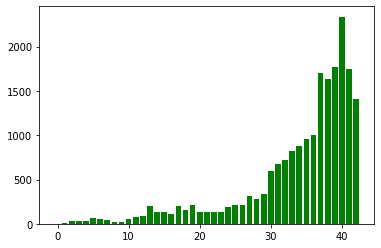

In [33]:
plt.bar(list(hist.keys()), hist.values(), color='g')
plt.show()

In [57]:
def predict(x):
    encoded_x = accumulatove_runner.config.token_codec.encode(x)
    x = torch.tensor(encoded_x).to(accumulatove_runner.config.my_device)
    x = x.reshape(1, x.shape[0])
    out = accumulatove_runner.runner.forward(x)
    return out
predict('3HX5DFSWIRV2SKA9645186N649IHLTVFGLZGSVV5Z4REN')

tensor([1.6802], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)

In [55]:
hist[40]

2338

In [58]:
a = []

In [60]:
a += [1]

In [61]:
a

[1]